In [190]:
import pandas as pd
import snap
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import copy
import numpy as np
from prettytable import PrettyTable
import mpmath
import powerlaw
import utils
import random
import itertools

In [2]:
atp_matches_files = glob.glob("data_alt/atp_matches_[0-9]*.csv")
futures_files = glob.glob("data_alt/atp_matches_futures*.csv")
qual_files = glob.glob("data_alt/atp_matches_qual*.csv")

In [3]:
atp_df = utils.read_alt_files(atp_matches_files)
futures_df = utils.read_alt_files(futures_files)
qual_df = utils.read_alt_files(qual_files)

In [6]:
atp_df = atp_df[atp_df['year']!=2016]
futures_df = futures_df[futures_df['year']!=2016]
qual_df = qual_df[qual_df['year']!=2016]

In [7]:
atp_names = set(atp_df['winner_name'].unique()).union(set(atp_df['loser_name'].unique()))
print "", len(atp_names), " different atp players"
print "", atp_df.shape[0], " atp matches"

 5539  different atp players
 160636  atp matches


In [8]:
futures_names = set(futures_df['winner_name'].unique()).union(set(futures_df['loser_name'].unique()))
print "", len(futures_names), " different futures players"
print "", futures_df.shape[0], " futures matches"

 17708  different futures players
 355856  futures matches


In [9]:
quals_names = set(qual_df['winner_name'].unique()).union(set(qual_df['loser_name'].unique()))
print "", len(quals_names), " different quals players"
print "", qual_df.shape[0], " quals matches"

 5662  different quals players
 117978  quals matches


In [10]:
df = pd.concat([atp_df, qual_df, futures_df], ignore_index=True)

In [11]:
total_names = set(df['winner_name']).union(set(df['loser_name']))
print "", len(total_names), " total players"
print "", df.shape[0], " total matches"

 20904  total players
 634470  total matches


In [12]:
names_df = pd.DataFrame()
names_df['id'] = range(len(total_names))
names_df['name'] = total_names


In [13]:
df['winner_id'] = df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
df['loser_id'] = df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

qual_df['winner_id'] = qual_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
qual_df['loser_id'] = qual_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

atp_df['winner_id'] = atp_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
atp_df['loser_id'] = atp_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

futures_df['winner_id'] = futures_df.merge(names_df,'left',left_on='winner_name', right_on='name')['id']
futures_df['loser_id'] = futures_df.merge(names_df,'left',left_on='loser_name', right_on='name')['id']

In [14]:
atpG = utils.get_graph(atp_df)    
qualG = utils.get_graph(qual_df)    
fG = utils.get_graph(futures_df) 
totalG = utils.get_graph(df)
    

In [33]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_dists(atpG)
atp_deg_data = utils.get_deg_data(atpG)
    
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_dists(qualG)
qual_deg_data = utils.get_deg_data(qualG)
    
f_deg_counts, f_degs, f_cdf, f_ccdf, f_pdf = utils.get_dists(fG)
f_deg_data = utils.get_deg_data(fG)
    
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_dists(totalG)
total_deg_data = utils.get_deg_data(totalG)


In [36]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

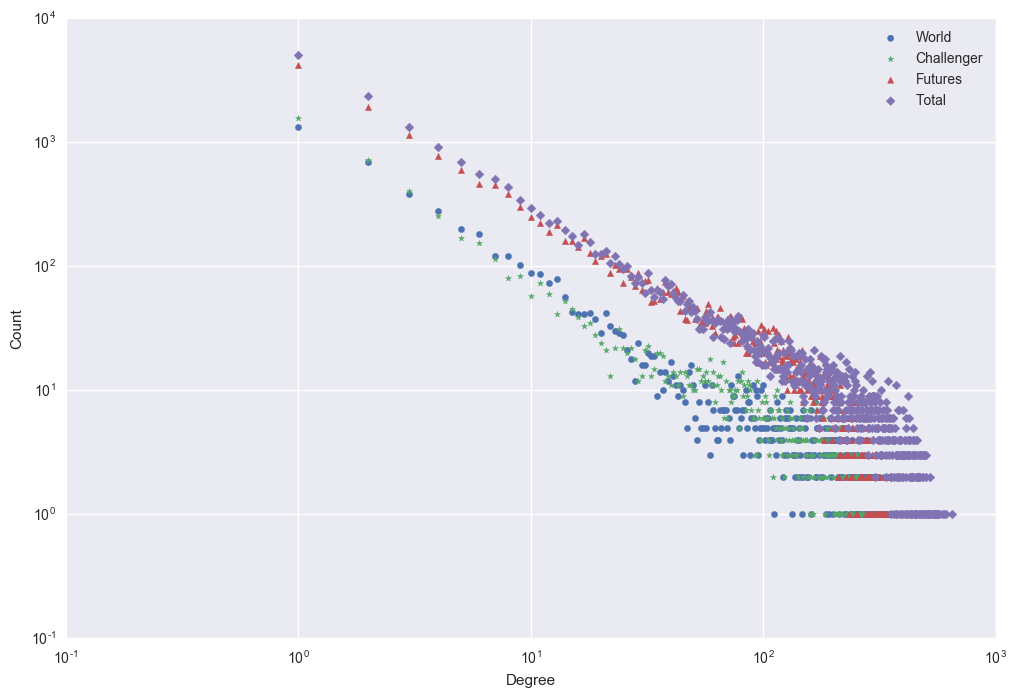

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(atp_degs, atp_deg_counts, marker='o', color=sns.color_palette()[0])
ax.scatter(qual_degs, qual_deg_counts, marker='*', color=sns.color_palette()[1])
ax.scatter(f_degs, f_deg_counts, marker='^', color=sns.color_palette()[2])
ax.scatter(total_degs, total_deg_counts, marker="D", color=sns.color_palette()[3])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()


In [48]:
atp_degs.shape

(312L,)

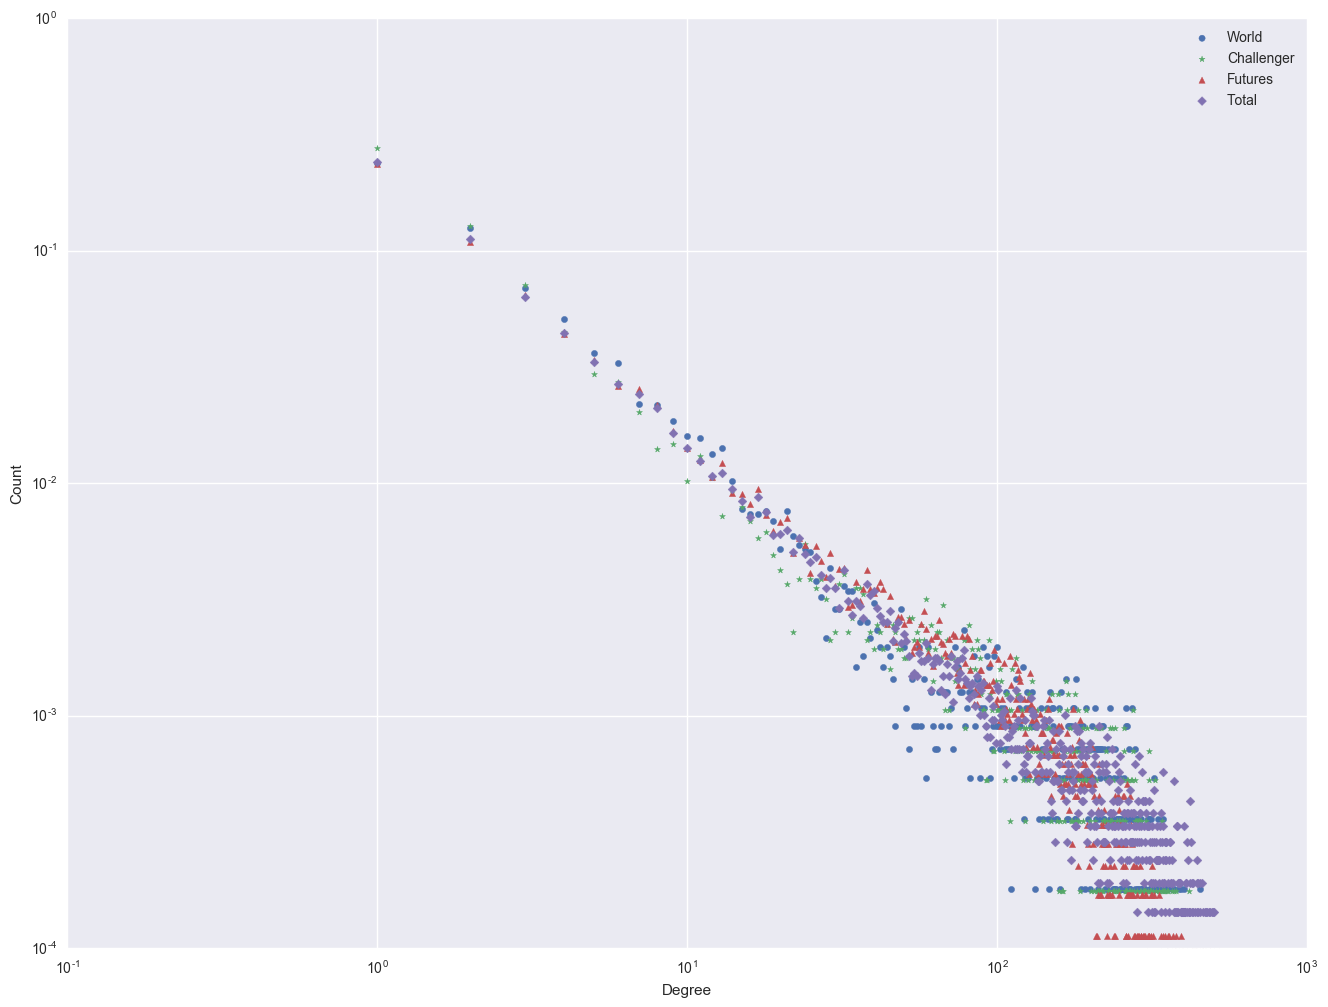

In [53]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.scatter(atp_degs, atp_pdf, marker='o', color=sns.color_palette()[0])
ax.scatter(qual_degs, qual_pdf, marker='*', color=sns.color_palette()[1])
ax.scatter(f_degs, f_pdf, marker='^', color=sns.color_palette()[2])
ax.scatter(total_degs, total_pdf, marker="D", color=sns.color_palette()[3])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Degree')
ax.set_ylim(1e-4, 1e0)
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()

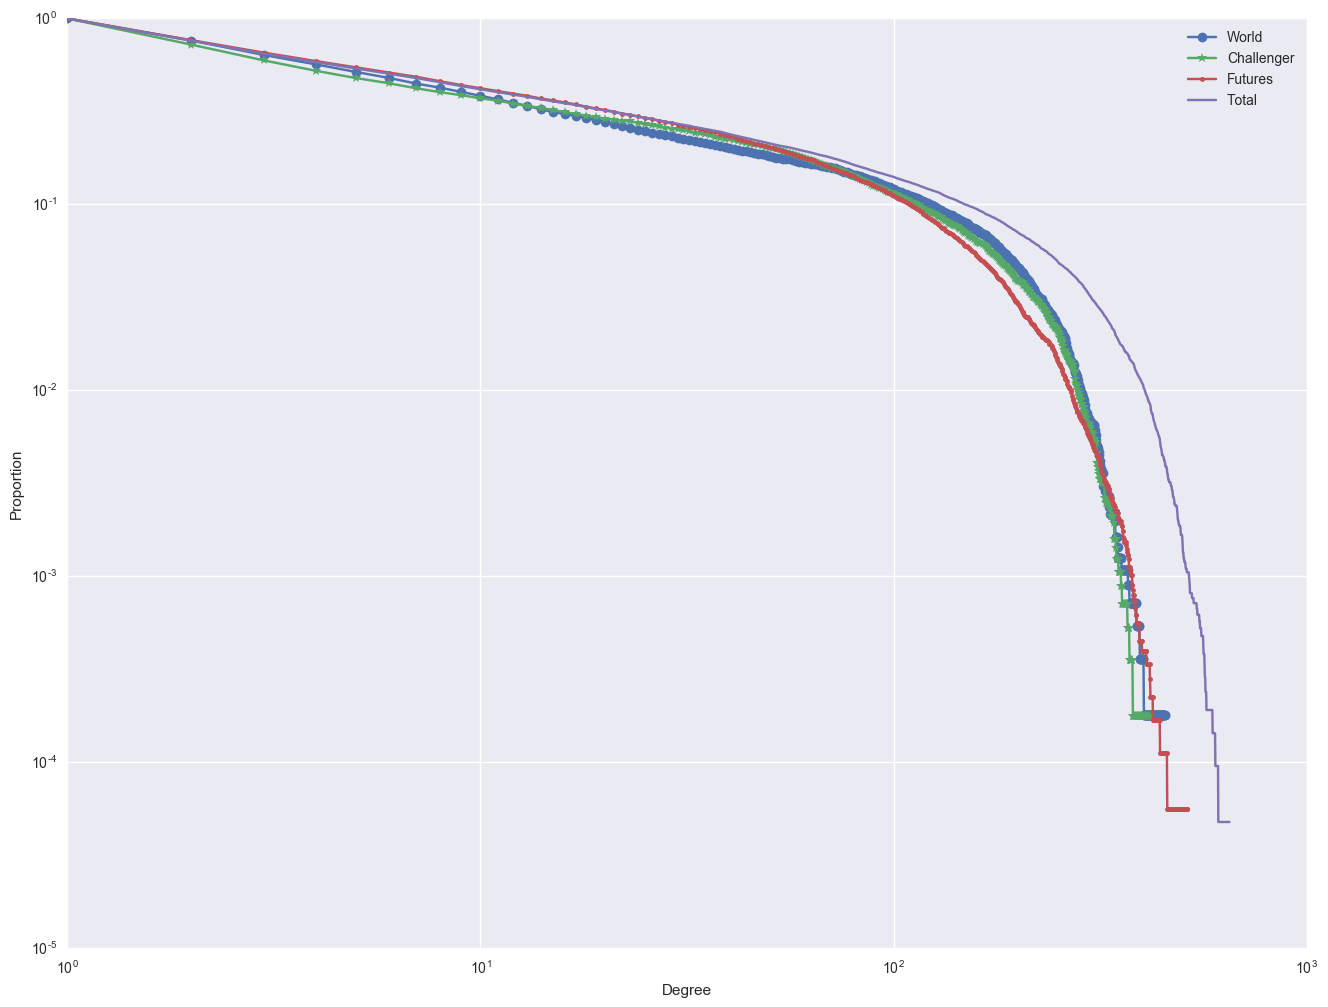

In [18]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(atp_degs, atp_ccdf[:-1], marker='o')
ax.plot(qual_degs, qual_ccdf[:-1], marker='*')
ax.plot(f_degs, f_ccdf[:-1], marker='.')
ax.plot(total_degs, total_ccdf[:-1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()

In [18]:
atp_alphas, atp_lambdas, atp_xmins, atp_years = utils.get_fit_params_by_year(atp_df)
qual_alphas, qual_lambdas, qual_xmins, qual_years = utils.get_fit_params_by_year(qual_df)
f_alphas, f_lambdas, f_xmins, f_years = utils.get_fit_params_by_year(futures_df)
total_alphas, total_lambdas, total_xmins, total_years = utils.get_fit_params_by_year(df)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1973 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Year 2008 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit

Year 2014 fitting failed with ZeroDivisionError exception



Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2002 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2007 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Year 2010 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2013 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1973 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1991 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1995 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 1999 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2005 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2009 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Year 2011 fitting failed with ZeroDivisionError exception


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


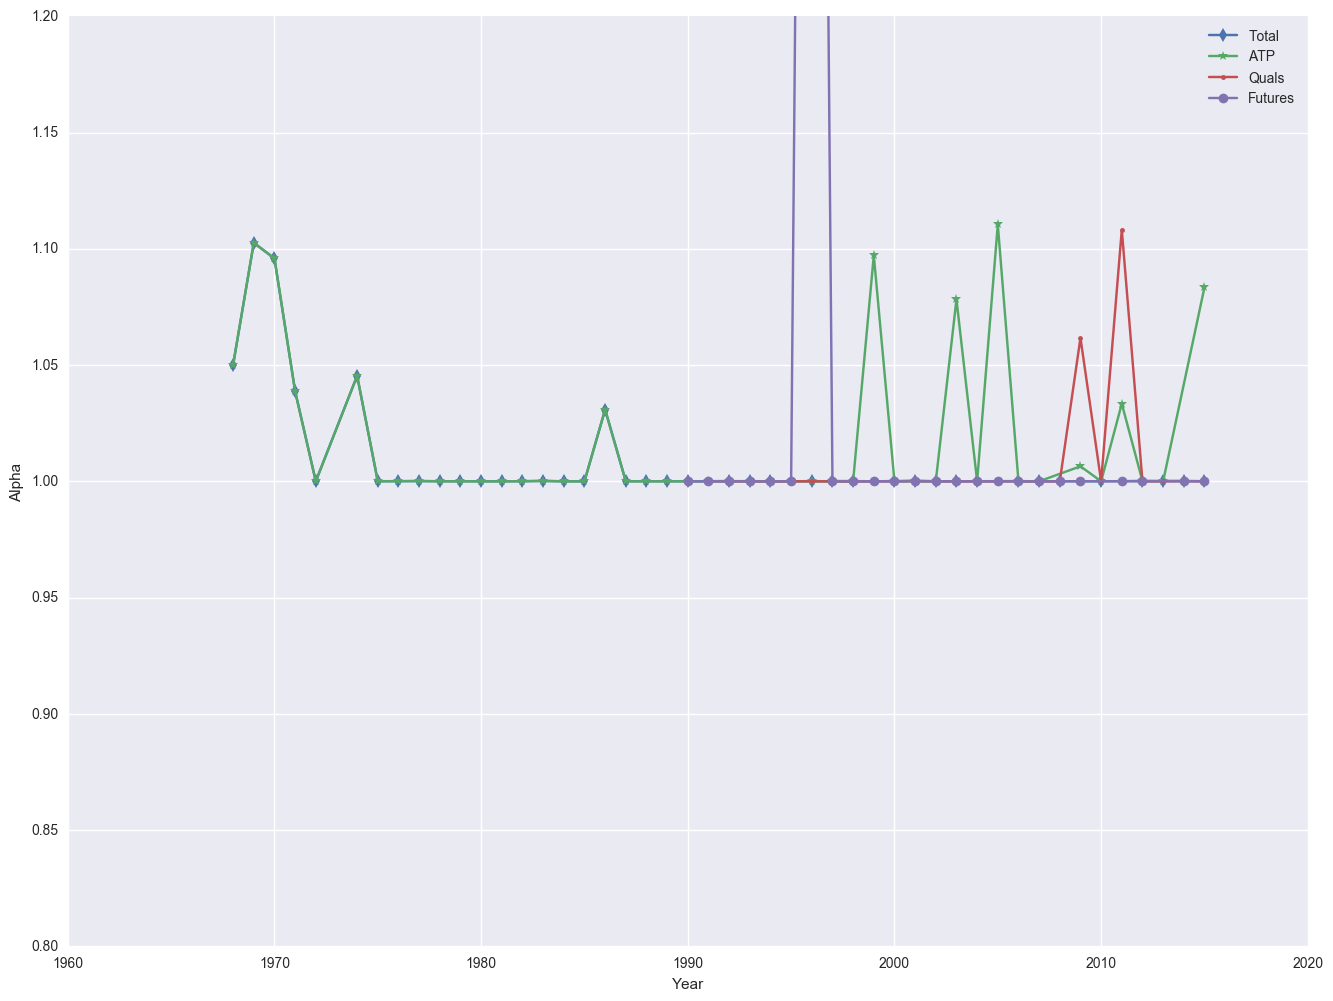

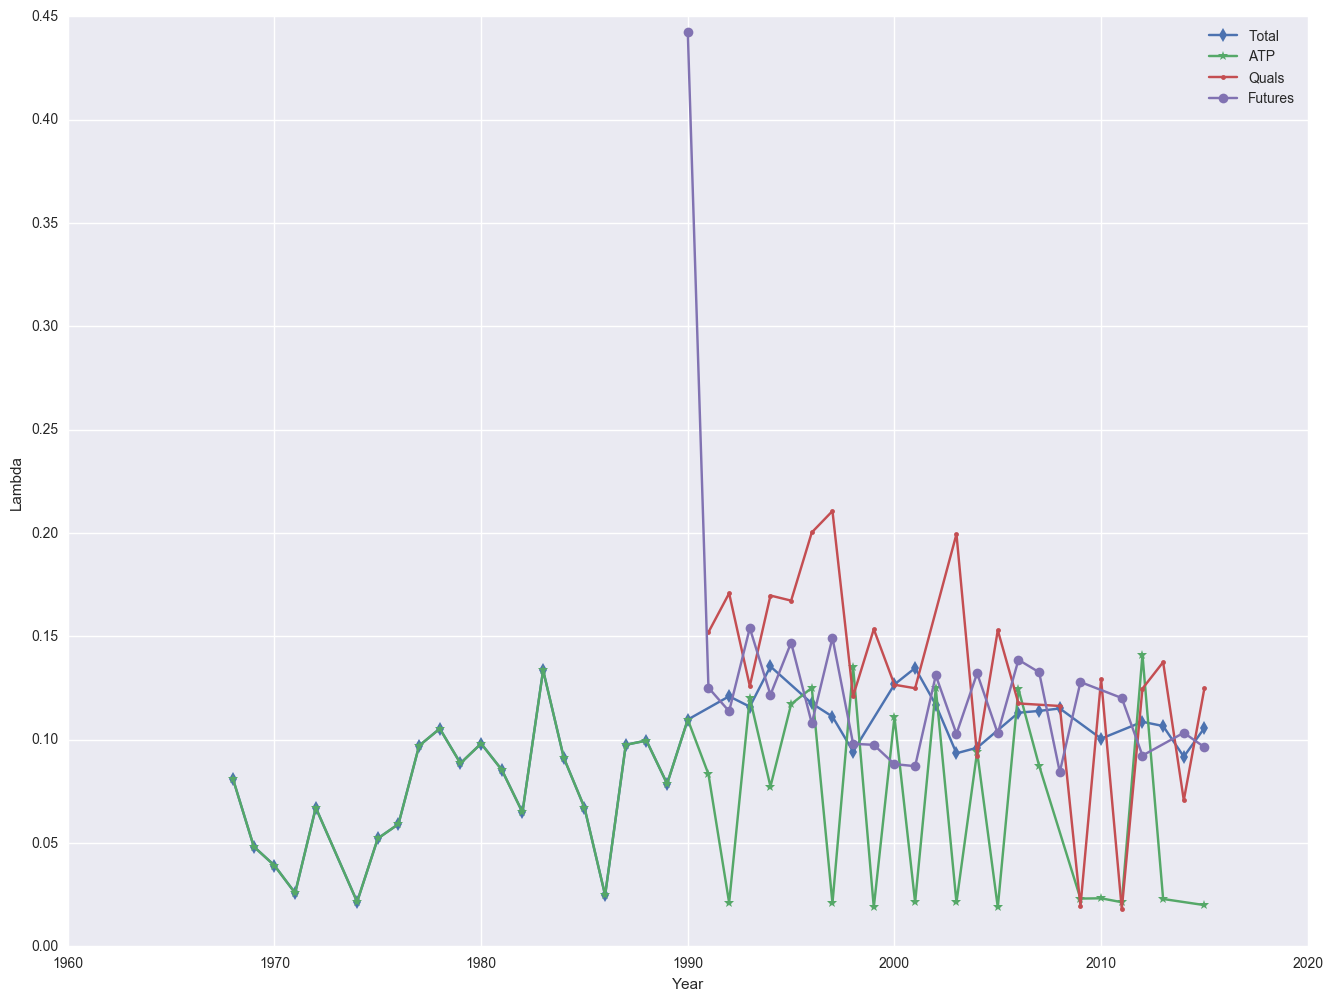

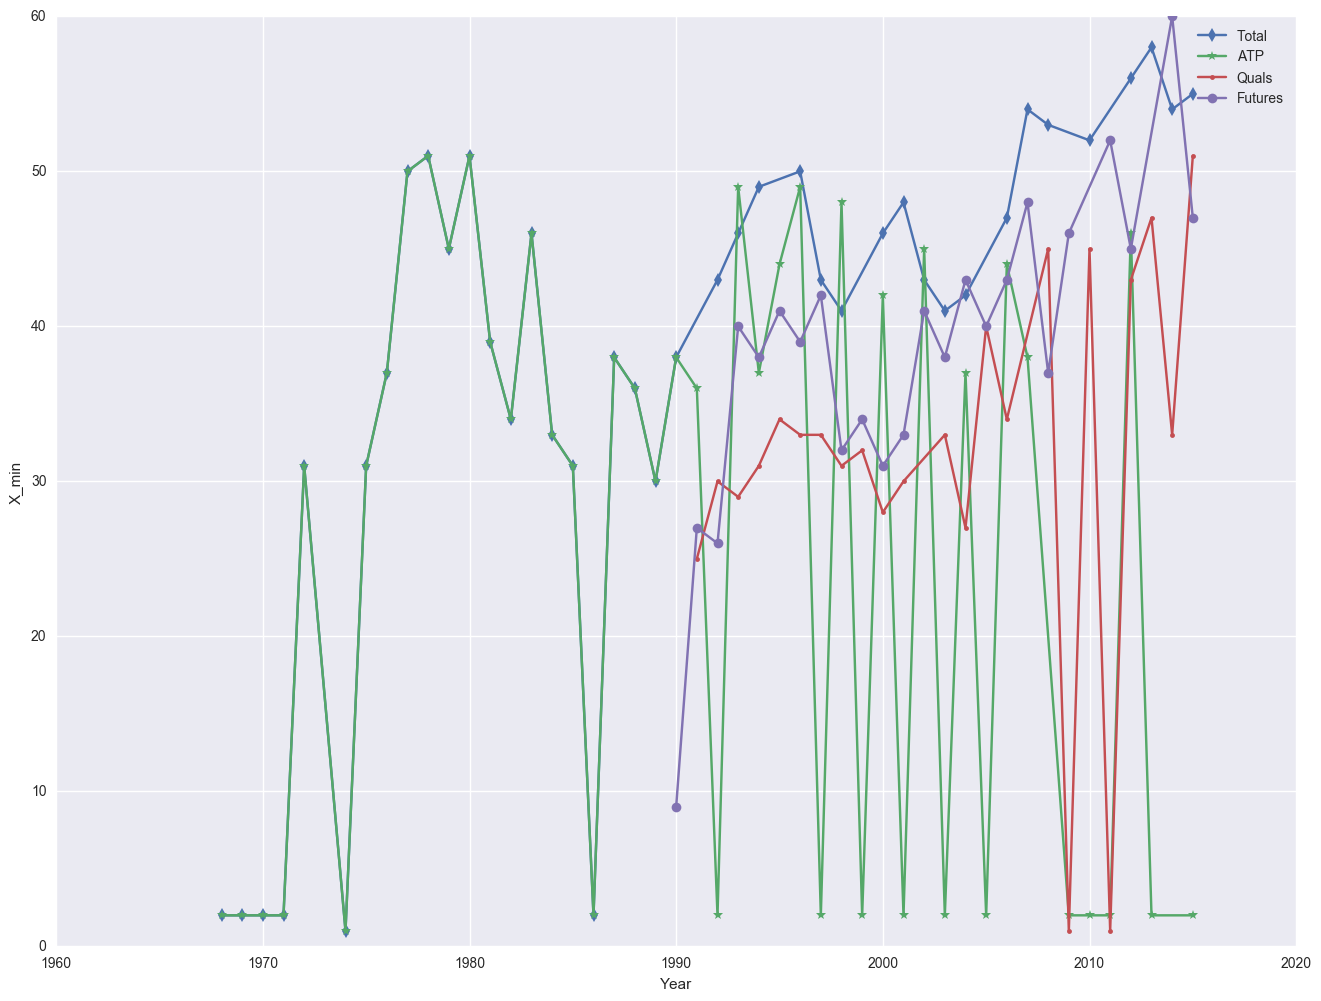

In [21]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_alphas, marker='d', label='Total')
ax.plot(atp_years, atp_alphas, marker='*', label='ATP')
ax.plot(qual_years, qual_alphas, marker='.', label='Quals')
ax.plot(f_years, f_alphas, marker='o', label='Futures')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Alpha')
ax.set_xlabel('Year')
ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_lambdas, marker='d', label='Total')
ax.plot(atp_years, atp_lambdas, marker='*', label='ATP')
ax.plot(qual_years, qual_lambdas, marker='.', label='Quals')
ax.plot(f_years, f_lambdas, marker='o', label='Futures')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('Lambda')
ax.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(total_years, total_xmins, marker='d', label='Total')
ax.plot(atp_years, atp_xmins, marker='*', label='ATP')
ax.plot(qual_years, qual_xmins, marker='.', label='Quals')
ax.plot(f_years, f_xmins, marker='o', label='Futures')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylabel('X_min')
ax.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
ax.legend()
plt.show()

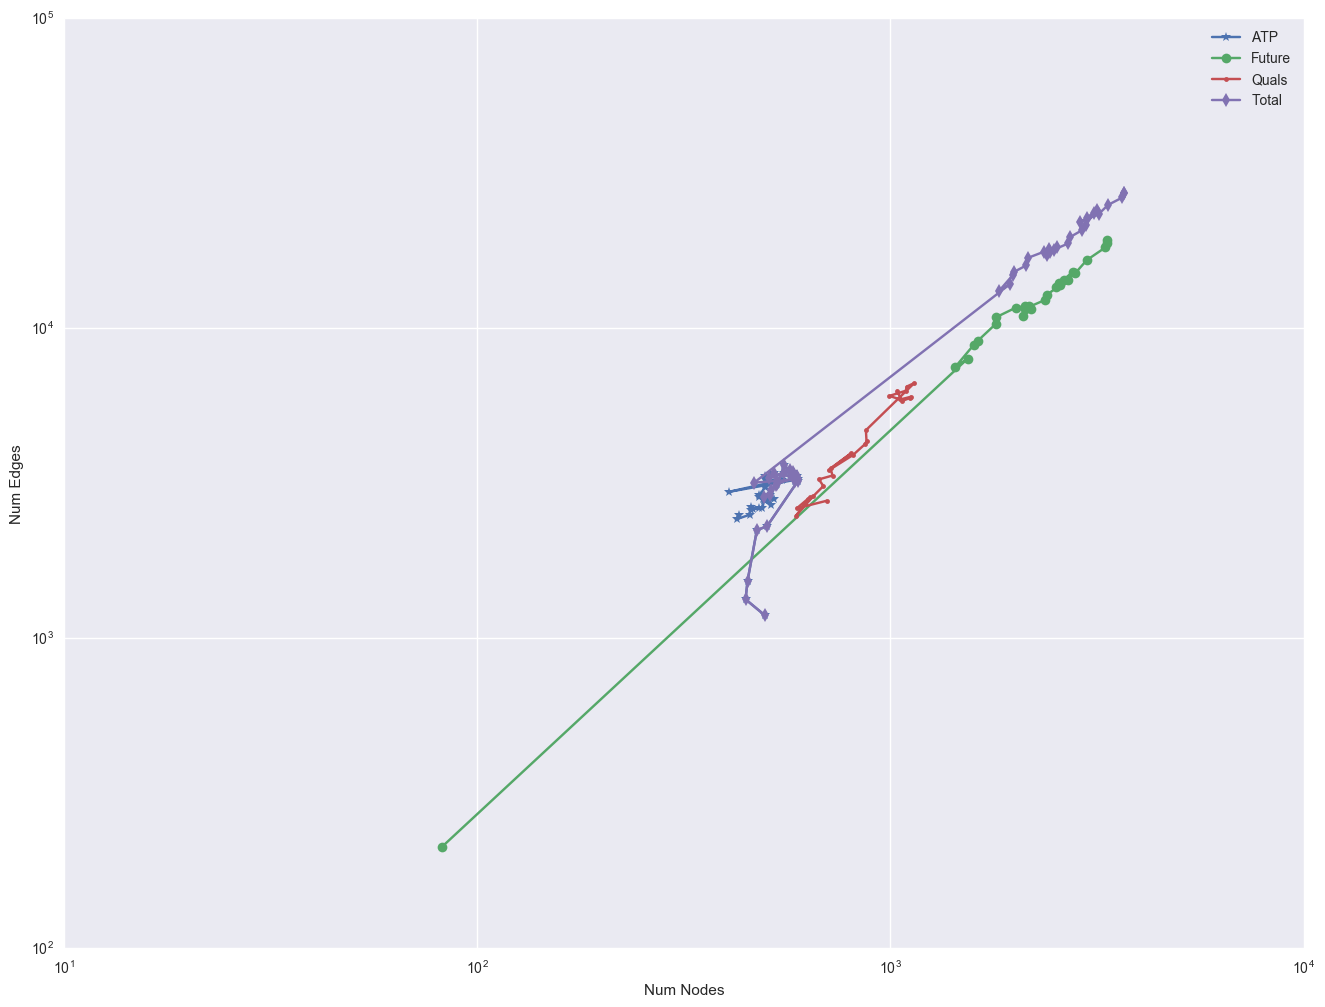

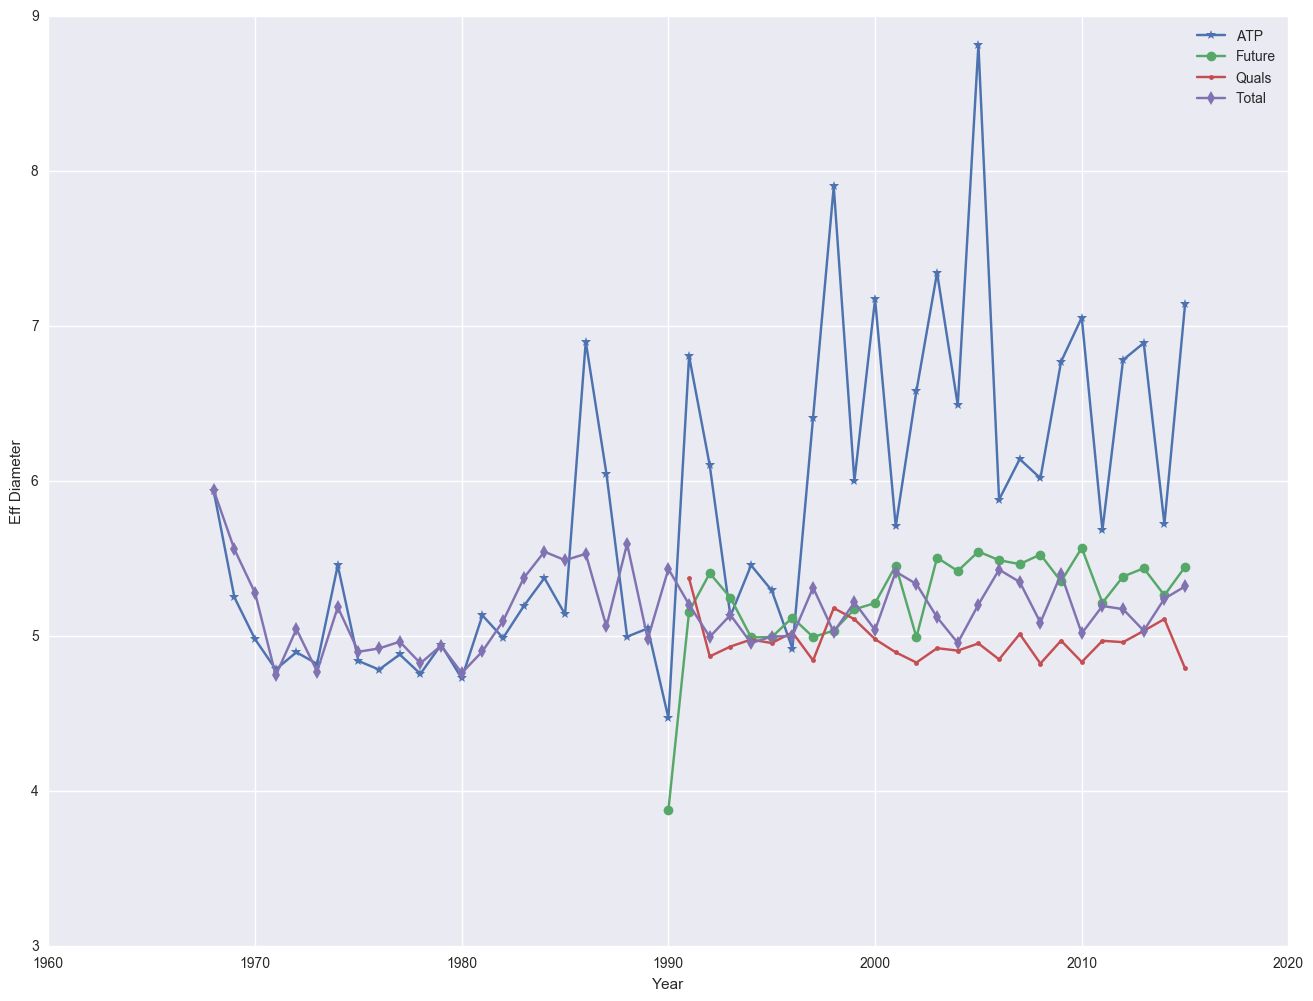

In [71]:
fig1 = plt.figure(figsize=(16,12))
fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(atp_df, 'ATP','*'), (futures_df, 'Future','o'), (qual_df, 'Quals','.'), (df, 'Total','d')]:
    N, E, D, years = utils.get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

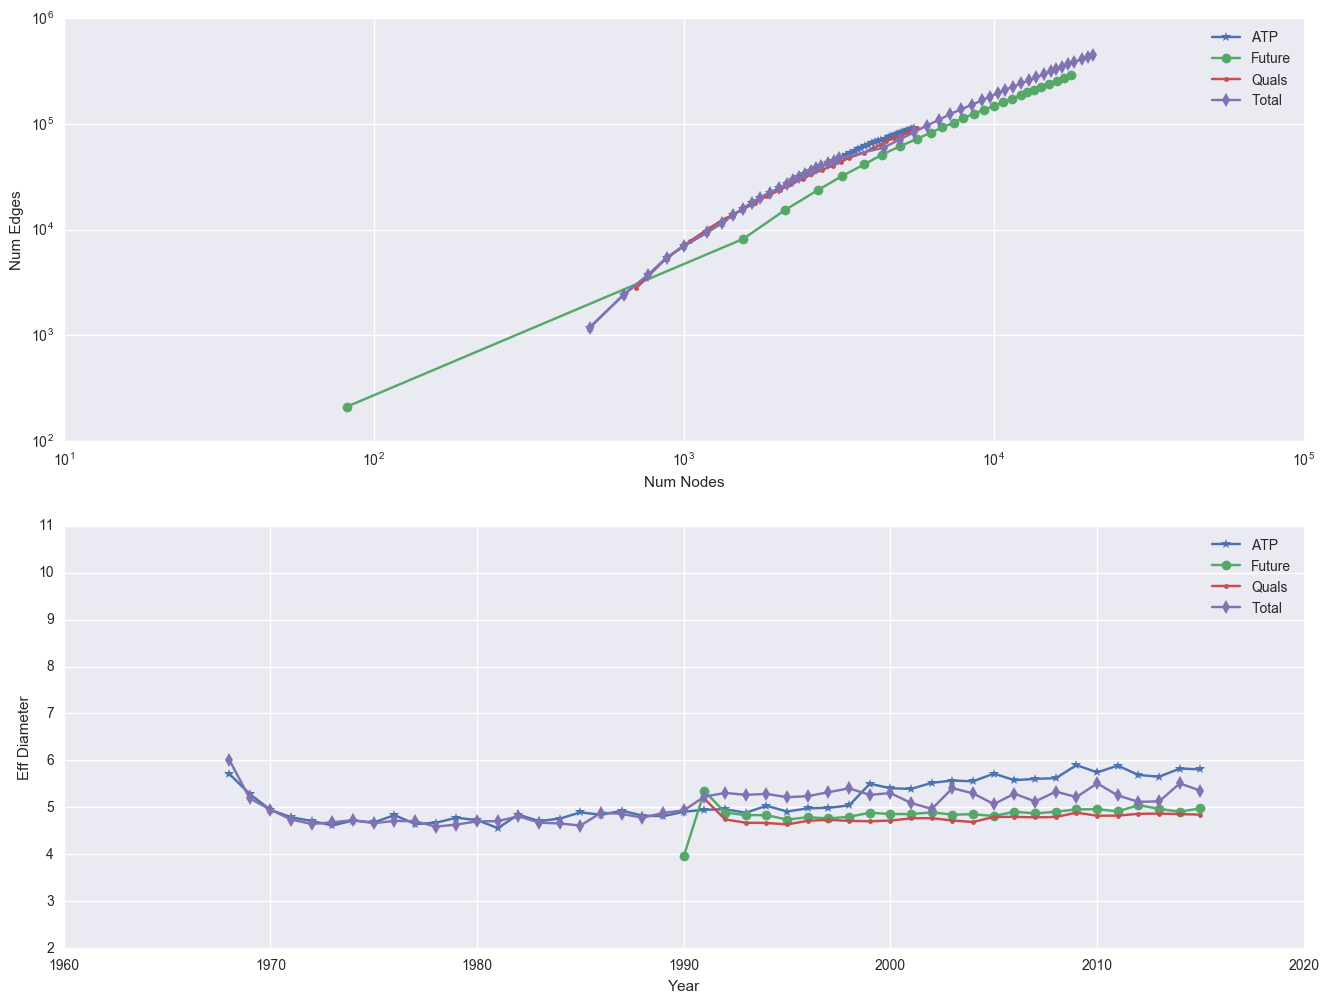

In [67]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

ax1.set_ylabel('Num Edges')
ax1.set_xlabel('Num Nodes')
ax2.set_ylabel('Eff Diameter')
ax2.set_xlabel('Year')
ax2.set_ylim([2,11])
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax.set_ylim([0.8,1.2])
ax.legend()
for tempdf, name, marker in [(atp_df, 'ATP','*'), (futures_df, 'Future','o'), (qual_df, 'Quals','.'), (df, 'Total','d')]:
    N, E, D, years = utils.cumulative_get_densification(tempdf)
    ax1.plot(N, E, label=name, marker=marker)
    ax2.plot(years, D, label=name, marker=marker)


ax1.legend()
ax2.legend()
plt.show()

In [26]:
def cumulative_get_cluster_coeff(df):
    years = sorted(df['year'].unique())
    out_clust_coeffs = []
    G = snap.TUNGraph.New()
    for year in years:
        utils.add_df_to_G(df[df['year']==year], G)
        out_clust_coeffs.append(snap.GetClustCf(G))
    return out_clust_coeffs, years

In [66]:
reload(utils)

<module 'utils' from 'utils.py'>

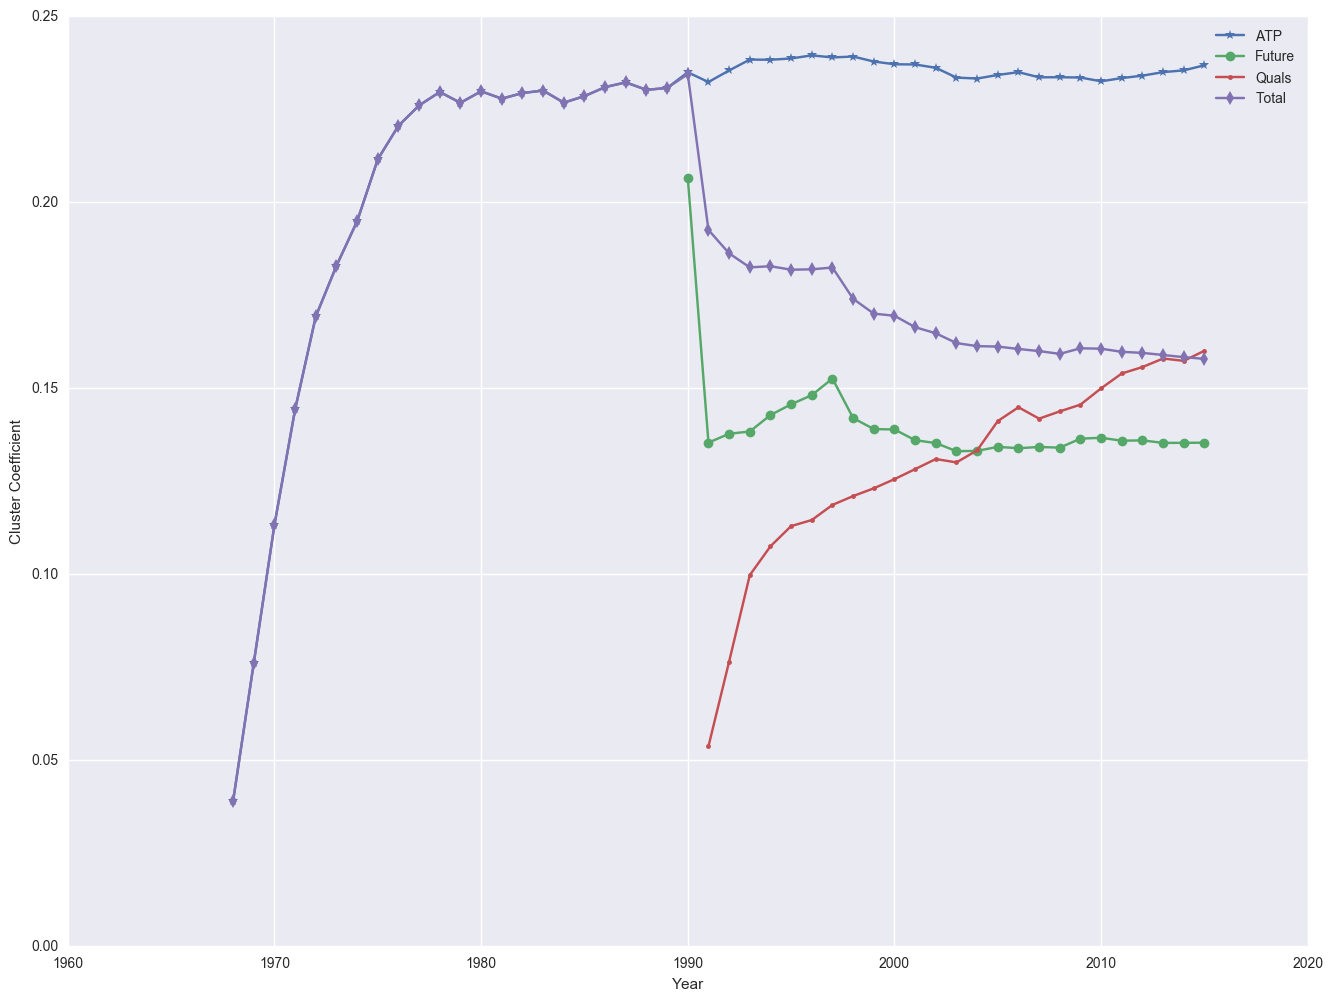

In [30]:
fig1 = plt.figure(figsize=(16,12))
# fig2 = plt.figure(figsize=(16,12))
ax1 = fig1.add_subplot(111)

ax1.set_ylabel('Cluster Coefficient')
ax1.set_xlabel('Year')
# ax.set_ylim([0.8,1.2])
for tempdf, name, marker in [(atp_df, 'ATP','*'), (futures_df, 'Future','o'), (qual_df, 'Quals','.'), (df, 'Total','d')]:
    cluster_coeffs, years = cumulative_get_cluster_coeff(tempdf)
    ax1.plot(years, cluster_coeffs, label=name, marker=marker)
ax1.legend()

ax1.legend()
plt.show()

Calculating best minimal value for power law fit


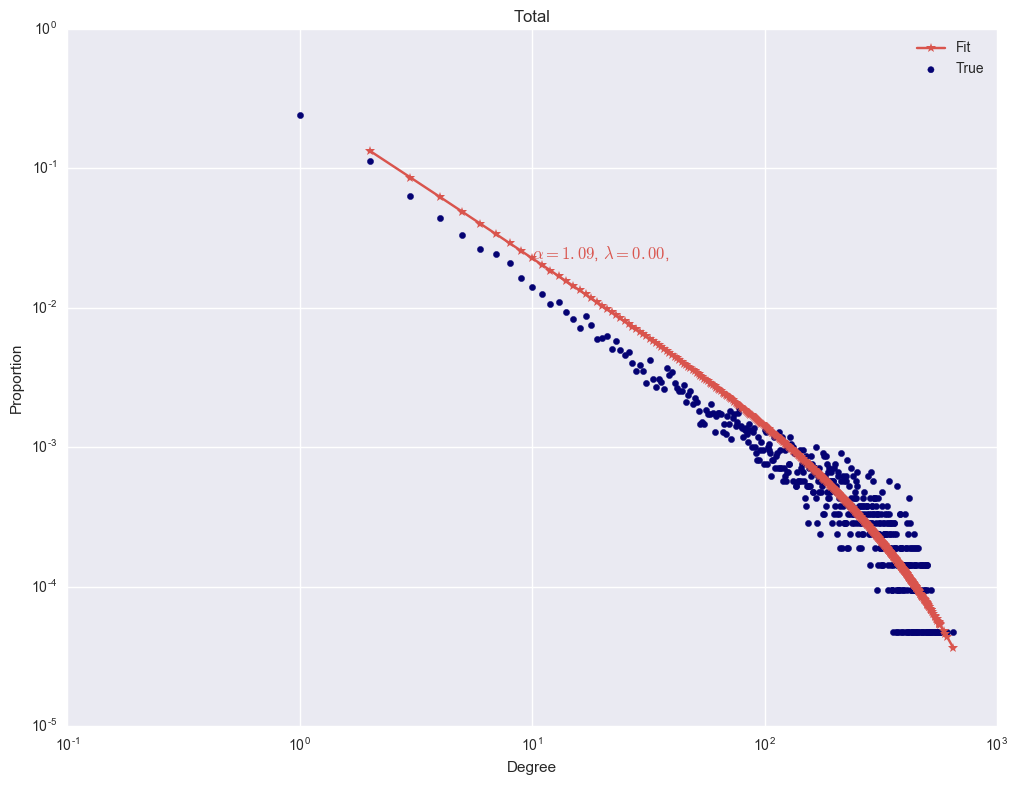

Calculating best minimal value for power law fit


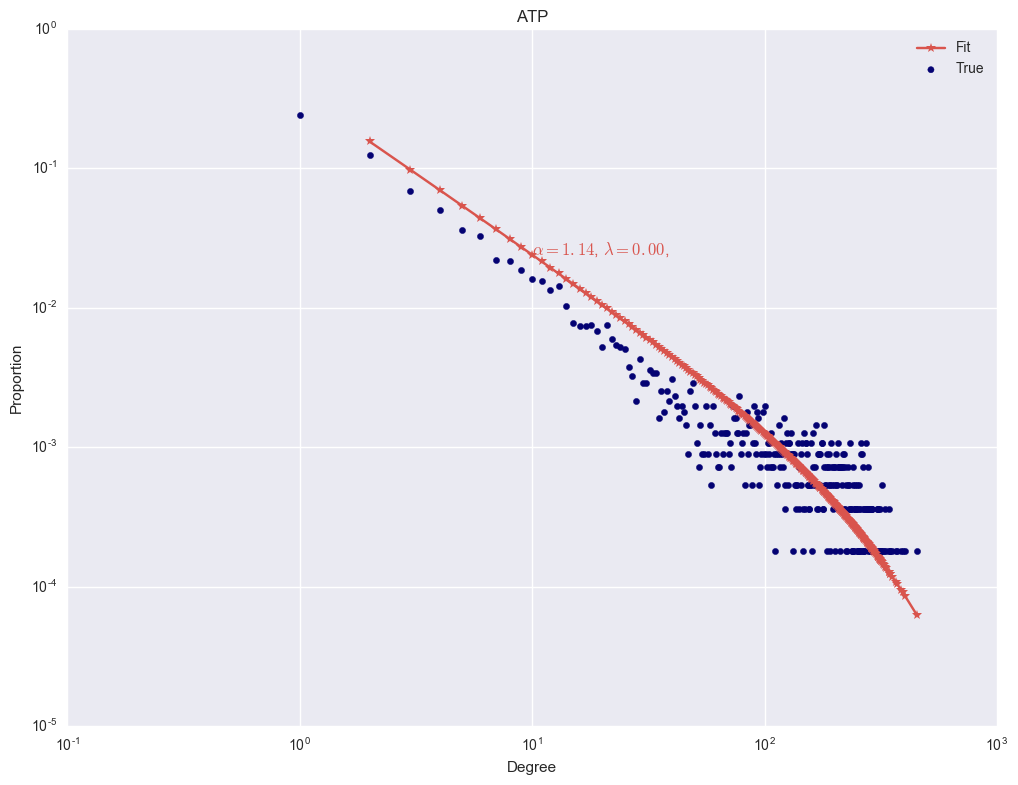

Calculating best minimal value for power law fit


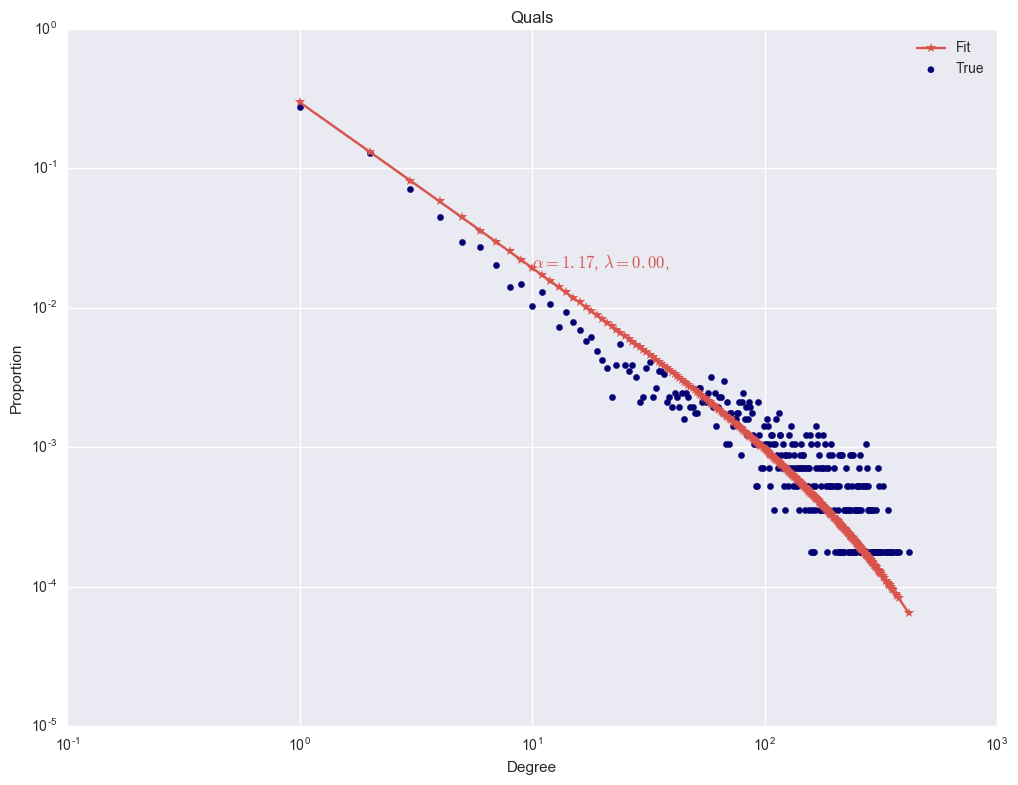

Calculating best minimal value for power law fit


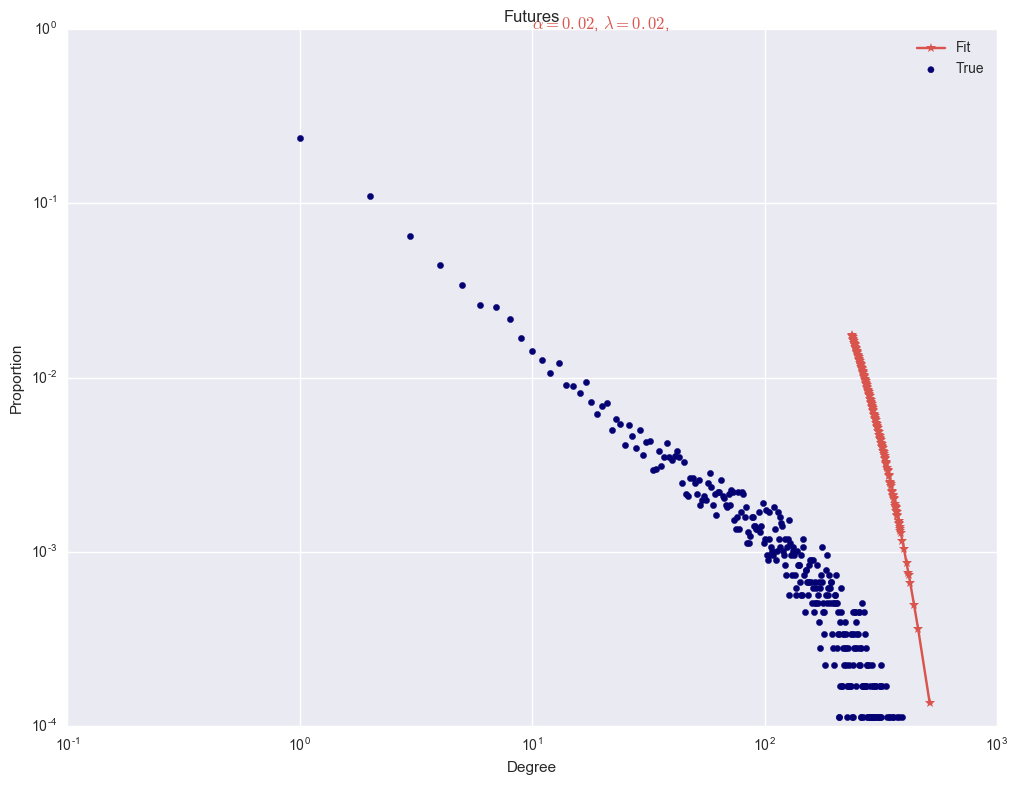

In [67]:
total_alpha, total_lambda, total_xmin,_ = utils.fit_truncated(total_deg_data)
utils.plot_fit(total_alpha, total_lambda, total_xmin, total_pdf, total_ccdf, total_degs, title="Total")

atp_alpha, atp_lambda, atp_xmin,_ = utils.fit_truncated(atp_deg_data)
utils.plot_fit(atp_alpha, atp_lambda, atp_xmin, atp_pdf, atp_ccdf, atp_degs, title="ATP")

qual_alpha, qual_lambda, qual_xmin,_ = utils.fit_truncated(qual_deg_data)
utils.plot_fit(qual_alpha, qual_lambda, qual_xmin, qual_pdf, qual_ccdf, qual_degs, title="Quals")

f_alpha, f_alpha, f_xmin,_ = utils.fit_truncated(f_deg_data)
utils.plot_fit(f_alpha, f_alpha, f_xmin, f_pdf, f_ccdf, f_degs, title="Futures")

In [118]:
def get_page_ranks(G, names_df):
    PRankH = snap.TIntFltH()
    snap.GetPageRank(G, PRankH)
    ranks = []
    for item in PRankH:
        name = names_df[names_df["id"] == item]["name"].values[0]
        ranks.append( (name, PRankH[item]) )
    return sorted(ranks, key=lambda x : x[1], reverse=True)

In [47]:
atp_deg_df = utils.get_deg_info(atpG, names_df)
qual_deg_df = utils.get_deg_info(qualG, names_df)
f_deg_df = utils.get_deg_info(fG, names_df)
total_deg_df = utils.get_deg_info(totalG, names_df)

In [59]:
total_deg_df[total_deg_df['deg'] >= 200].sort_values("deg", ascending=False).head()

,id,deg,name
4509,20102,649,Ivo Klec
5496,5874,609,Jan Mertl
4151,19925,599,Ruben Ramirez Hidalgo
3401,17159,590,Razvan Sabau
3933,10100,570,Danai Udomchoke
4313,12057,567,Timo Nieminen
4331,19581,565,Rik De Voest
3381,19512,564,Herbert Wiltschnig
4359,12596,561,Alessio Di Mauro
4601,11917,560,Jaroslav Pospisil


In [153]:
federer_ranks, federer_years = utils.player_page_rank_year(df, "Roger Federer", names_df)

In [154]:
federer_ranks

[2.093747457133501e-05,
 5.7260275774147974e-05,
 0.00010233128026691225,
 0.0002439174215028714,
 0.0004348205116501147,
 0.000583003510666599,
 0.0006804206034071401,
 0.0007530271220746542,
 0.0007815133044233222,
 0.0008260502083136215,
 0.0008534106534515929,
 0.0008626456460835702,
 0.0008577993834967142,
 0.0008467650329568628,
 0.00084180026444511,
 0.0008546920370094266,
 0.0008601758221343897,
 0.0008588764550019754,
 0.0008558880836209279,
 0.0008470718212541908]

In [43]:
temp_atp.join(names_df.set_index('id'), on="id").tail()

,id,deg,name
5534,9213,2,Alex Diaz
5535,11554,1,Rodrigo Banzer
5536,11367,1,Rodrigo Arus
5537,831,1,Nicolas Xiviller
5538,18044,1,Tim Van Rijthoven


In [123]:
print "--------------------ATP--------------------"
utils.print_fit_results(atp_deg_data, True)
print 
print

print "--------------------Qual--------------------"
utils.print_fit_results(qual_deg_data, True)
print 
print

print "--------------------Futures--------------------"
utils.print_fit_results(f_deg_data, True)
print 
print

print "--------------------Total--------------------"
utils.print_fit_results(total_deg_data, True)
print 
print

--------------------ATP--------------------
alpha: 1.45884233274
x_min: 2.0
Number of Data Points: 5539


Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -279.93,0.000  | 1611.25,0.000 |   -427.77,0.000   |     -334.13,0.000     |
|   lognormal_positive  |  279.93,0.000  |   0.00,1.000   | 1891.18,0.000 |   -147.83,0.000   |      -54.20,0.000     |
|      exponential      | -1611.25,0.000 | -1891.18,0.000 |   0.00,1.000  |   -2039.01,0.000  |     -1945.38,0.000    |
|  truncated_power_law  |  427.77,0.000  |  147.83,0.000  | 2039.01,0.000 |     0.00,1.000    |      93.64,0.000      |
| stretched_exponential |  334.13,0.000  |  54.20,0.000   | 1945.38,0.000 |    -93.64,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -312.49,0.000  | 3797.87,0.000 |   -514.39,0.000   |     -378.47,0.000     |
|   lognormal_positive  |  312.49,0.000  |   0.00,1.000   | 4110.37,0.000 |   -201.89,0.000   |      -65.97,0.000     |
|      exponential      | -3797.87,0.000 | -4110.37,0.000 |   0.00,1.000  |   -4312.26,0.000  |     -4176.34,0.000    |
|  truncated_power_law  |  514.39,0.000  |  201.89,0.000  | 4312.26,0.000 |     0.00,1.000    |      135.92,0.000     |
| stretched_exponential |  378.47,0.000  |  65.97,0.000   | 4176.34,0.000 |   -135.92,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -6.44,0.037 | -5.52,0.002 |    -4.87,0.002    |      -6.81,0.032      |
|   lognormal_positive  | 6.44,0.037 |  0.00,1.000 |  0.92,0.479 |     1.57,0.354    |      -0.37,0.336      |
|      exponential      | 5.52,0.002 | -0.92,0.479 |  0.00,1.000 |     0.65,0.248    |      -1.29,0.109      |
|  truncated_power_law  | 4.87,0.002 | -1.57,0.354 | -0.65,0.248 |     0.00,1.000    |      -1.94,0.280      |
| stretched_exponential | 6.81,0.032 |  0.37,0.336 |  1.29,0.109 |     1.94,0.280    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+



Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -1324.09,0.000 | 5889.63,0.000 |   -1962.74,0.000  |     -1588.68,0.000    |
|   lognormal_positive  | 1324.09,0.000  |   0.00,1.000   | 7213.72,0.000 |   -638.65,0.000   |     -264.59,0.000     |
|      exponential      | -5889.63,0.000 | -7213.72,0.000 |   0.00,1.000  |   -7852.37,0.000  |     -7478.31,0.000    |
|  truncated_power_law  | 1962.74,0.000  |  638.65,0.000  | 7852.37,0.000 |     0.00,1.000    |      374.06,0.000     |
| stretched_exponential | 1588.68,0.000  |  264.59,0.000  | 7478.31,0.000 |   -374.06,0.000   |       0.00,1.000      |
+-----------------------+---------------

Assuming nested distributions


In [125]:
atp_directed_graph = utils.get_directed_graph(atp_df)
print("ATP")
print("In-Degree")
atp_in_deg_data = utils.get_in_deg_data(atp_directed_graph)
utils.print_fit_results(atp_in_deg_data, True)
print()
print("Out-Degree")
atp_out_deg_data = utils.get_out_deg_data(atp_directed_graph)
utils.print_fit_results(atp_out_deg_data, True)
print("")

qual_directed_graph = utils.get_directed_graph(qual_df)
print("Quals")
print("In-Degree")
qual_in_deg_data = utils.get_in_deg_data(qual_directed_graph)
utils.print_fit_results(qual_in_deg_data, True)
print()
print("Out-Degree")
qual_out_deg_data = utils.get_out_deg_data(qual_directed_graph)
utils.print_fit_results(qual_out_deg_data, True)
print("")

futures_directed_graph = utils.get_directed_graph(futures_df)
print("Futures")
print("In-Degree")
futures_in_deg_data = utils.get_in_deg_data(futures_directed_graph)
utils.print_fit_results(futures_in_deg_data, True)
print()
print("Out-Degree")
futures_out_deg_data = utils.get_out_deg_data(futures_directed_graph)
utils.print_fit_results(futures_out_deg_data, True)
print("")

total_directed_graph = utils.get_directed_graph(df)
print("Total")
print("In-Degree")
total_in_deg_data = utils.get_in_deg_data(total_directed_graph)
utils.print_fit_results(total_in_deg_data, True)
print()
print("Out-Degree")
total_out_deg_data = utils.get_out_deg_data(total_directed_graph)
utils.print_fit_results(total_out_deg_data, True)
print("")

ATP
In-Degree
alpha: 3.93837996039
x_min: 339.0
Number of Data Points: 5539


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -2.41,0.157 | -2.33,0.305 |    -2.56,0.024    |      -2.53,0.141      |
|   lognormal_positive  | 2.41,0.157 |  0.00,1.000 |  0.08,0.899 |    -0.15,0.425    |      -0.12,0.412      |
|      exponential      | 2.33,0.305 | -0.08,0.899 |  0.00,1.000 |    -0.23,0.706    |      -0.20,0.525      |
|  truncated_power_law  | 2.56,0.024 |  0.15,0.425 |  0.23,0.706 |     0.00,1.000    |       0.03,0.651      |
| stretched_exponential | 2.53,0.141 |  0.12,0.412 |  0.20,0.525 |    -0.03,0.651    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions

+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|                       |     power      |   lognormal    |  exponential  | power with cutoff | stretched exponential |
+-----------------------+----------------+----------------+---------------+-------------------+-----------------------+
|       power_law       |   0.00,1.000   | -184.90,0.000  | 1866.82,0.000 |   -306.44,0.000   |     -222.13,0.000     |
|   lognormal_positive  |  184.90,0.000  |   0.00,1.000   | 2051.72,0.000 |   -121.54,0.000   |      -37.23,0.000     |
|      exponential      | -1866.82,0.000 | -2051.72,0.000 |   0.00,1.000  |   -2173.26,0.000  |     -2088.95,0.000    |
|  truncated_power_law  |  306.44,0.000  |  121.54,0.000  | 2173.26,0.000 |     0.00,1.000    |      84.31,0.000      |
| stretched_exponential |  222.13,0.000  |  37.23,0.000   | 2088.95,0.000 |    -84.31,0.000   |       0.00,1.000      |
+-----------------------+---------------


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -4.11,0.089 | -3.03,0.004 |    -2.72,0.020    |      -4.31,0.085      |
|   lognormal_positive  | 4.11,0.089 |  0.00,1.000 |  1.08,0.434 |     1.39,0.367    |      -0.20,0.562      |
|      exponential      | 3.03,0.004 | -1.08,0.434 |  0.00,1.000 |     0.31,0.065    |      -1.28,0.109      |
|  truncated_power_law  | 2.72,0.020 | -1.39,0.367 | -0.31,0.065 |     0.00,1.000    |      -1.59,0.332      |
| stretched_exponential | 4.31,0.085 |  0.20,0.562 |  1.28,0.109 |     1.59,0.332    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -4.46,0.052 | -3.74,0.002 |    -3.38,0.009    |      -4.93,0.043      |
|   lognormal_positive  | 4.46,0.052 |  0.00,1.000 |  0.72,0.519 |     1.08,0.407    |      -0.46,0.120      |
|      exponential      | 3.74,0.002 | -0.72,0.519 |  0.00,1.000 |     0.36,0.058    |      -1.19,0.124      |
|  truncated_power_law  | 3.38,0.009 | -1.08,0.407 | -0.36,0.058 |     0.00,1.000    |      -1.54,0.283      |
| stretched_exponential | 4.93,0.043 |  0.46,0.120 |  1.19,0.124 |     1.54,0.283    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+



Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -2.27,0.179 | -2.43,0.100 |    -2.33,0.031    |      -2.49,0.161      |
|   lognormal_positive  | 2.27,0.179 |  0.00,1.000 | -0.16,0.501 |    -0.06,0.901    |      -0.22,0.129      |
|      exponential      | 2.43,0.100 |  0.16,0.501 |  0.00,1.000 |     0.10,0.639    |      -0.06,0.724      |
|  truncated_power_law  | 2.33,0.031 |  0.06,0.901 | -0.10,0.639 |     0.00,1.000    |      -0.17,0.751      |
| stretched_exponential | 2.49,0.161 |  0.22,0.129 |  0.06,0.724 |     0.17,0.751    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
(

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|                       |   power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+
|       power_law       | 0.00,1.000 | -8.97,0.010 | -9.15,0.002 |    -8.66,0.000    |      -9.37,0.009      |
|   lognormal_positive  | 8.97,0.010 |  0.00,1.000 | -0.18,0.768 |     0.31,0.773    |      -0.40,0.224      |
|      exponential      | 9.15,0.002 |  0.18,0.768 |  0.00,1.000 |     0.49,0.331    |      -0.22,0.504      |
|  truncated_power_law  | 8.66,0.000 | -0.31,0.773 | -0.49,0.331 |     0.00,1.000    |      -0.72,0.525      |
| stretched_exponential | 9.37,0.009 |  0.40,0.224 |  0.22,0.504 |     0.72,0.525    |       0.00,1.000      |
+-----------------------+------------+-------------+-------------+-------------------+-----------------------+



Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Assuming nested distributions



Number of Data Points: 20904
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|                       |    power    |  lognormal  | exponential | power with cutoff | stretched exponential |
+-----------------------+-------------+-------------+-------------+-------------------+-----------------------+
|       power_law       |  0.00,1.000 | -1.06,0.000 |  2.21,0.371 |    -1.16,0.128    |      -0.83,0.186      |
|   lognormal_positive  |  1.06,0.000 |  0.00,1.000 |  3.27,0.132 |    -0.09,0.730    |       0.23,0.490      |
|      exponential      | -2.21,0.371 | -3.27,0.132 |  0.00,1.000 |    -3.37,0.168    |      -3.04,0.014      |
|  truncated_power_law  |  1.16,0.128 |  0.09,0.730 |  3.37,0.168 |     0.00,1.000    |       0.32,0.590      |
| stretched_exponential |  0.83,0.186 | -0.23,0.490 |  3.04,0.014 |    -0.32,0.590    |       0.00,1.000      |
+-----------------------+-------------+-------------+-------------+-------

Assuming nested distributions


+-----------------------+-----------------+-----------------+----------------+-------------------+-----------------------+
|                       |      power      |    lognormal    |  exponential   | power with cutoff | stretched exponential |
+-----------------------+-----------------+-----------------+----------------+-------------------+-----------------------+
|       power_law       |    0.00,1.000   |  -1543.49,0.000 | 11951.82,0.000 |   -2157.73,0.000  |     -1797.70,0.000    |
|   lognormal_positive  |  1543.49,0.000  |    0.00,1.000   | 13495.31,0.000 |   -614.24,0.000   |     -254.21,0.000     |
|      exponential      | -11951.82,0.000 | -13495.31,0.000 |   0.00,1.000   |  -14109.55,0.000  |    -13749.52,0.000    |
|  truncated_power_law  |  2157.73,0.000  |   614.24,0.000  | 14109.55,0.000 |     0.00,1.000    |      360.04,0.000     |
| stretched_exponential |  1797.70,0.000  |   254.21,0.000  | 13749.52,0.000 |   -360.04,0.000   |       0.00,1.000      |
+---------------

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


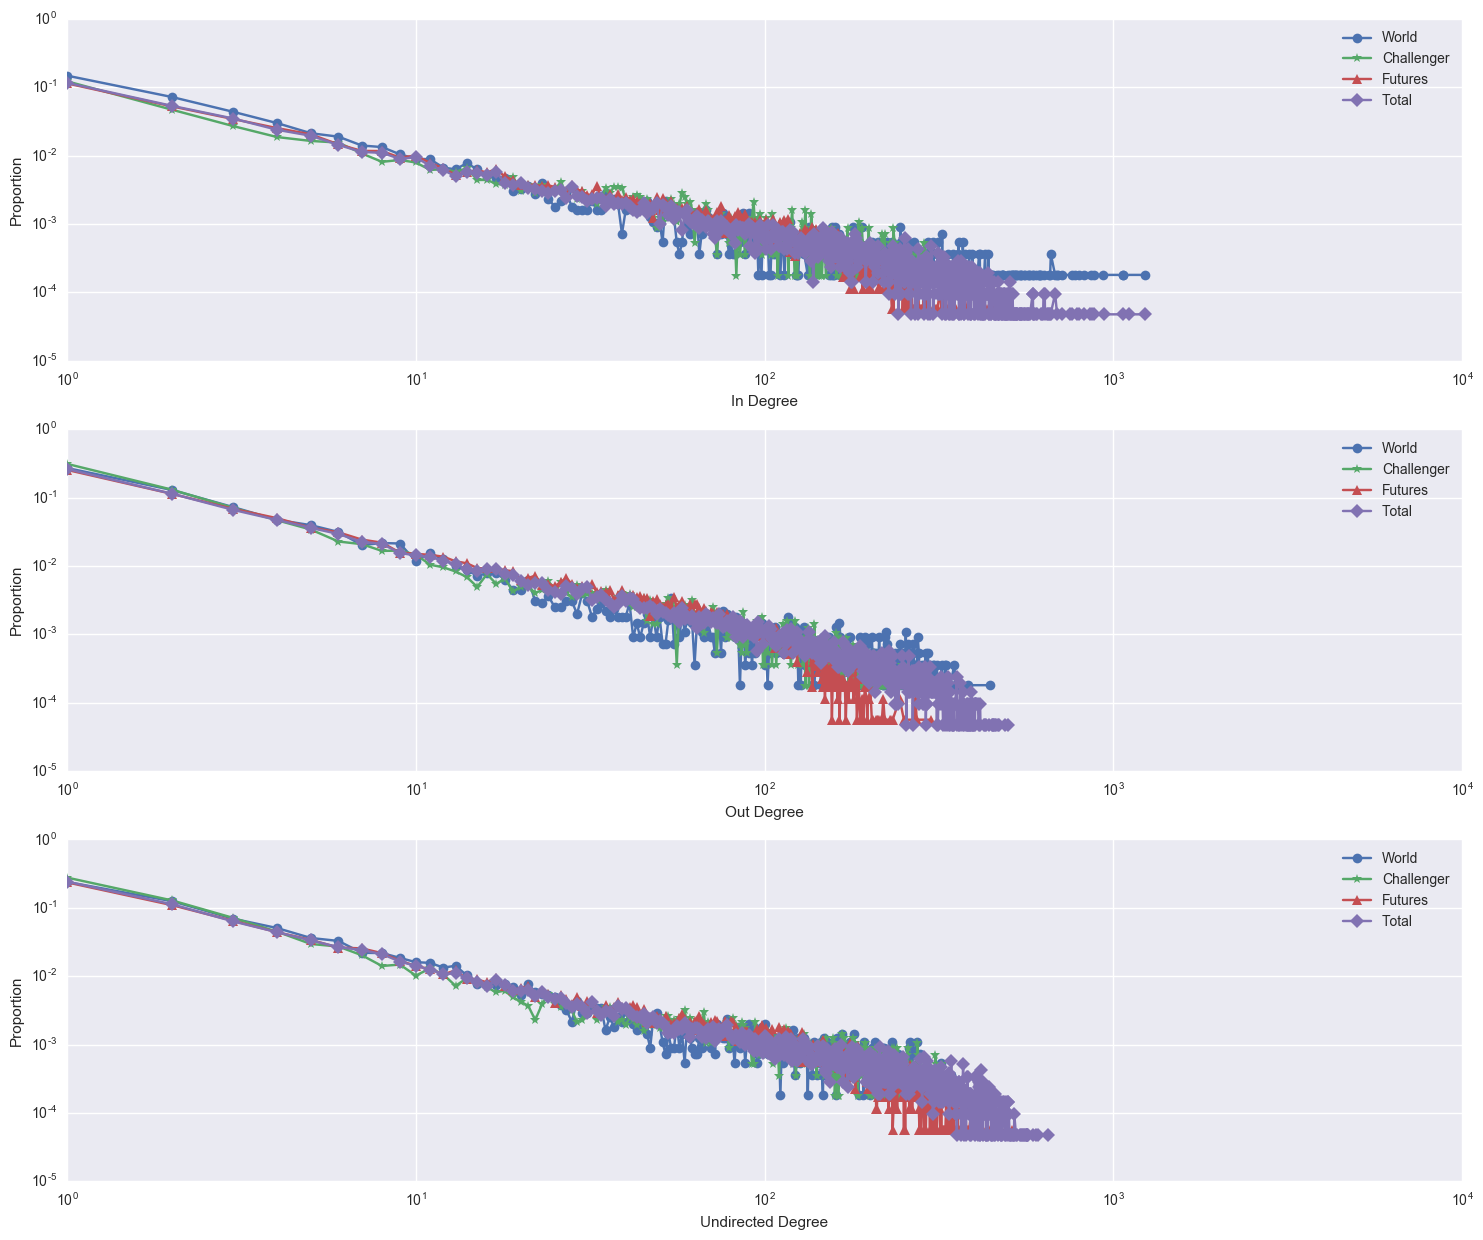

In [136]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_in_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_in_dists(qual_directed_graph)
futures_deg_counts, futures_degs, futures_cdf, futures_ccdf, futures_pdf = utils.get_in_dists(futures_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_in_dists(total_directed_graph)

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(311)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(futures_degs, futures_pdf, marker='^')
ax.plot(total_degs, total_pdf, marker='D')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('In Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
# plt.show()

atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_out_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_out_dists(qual_directed_graph)
futures_deg_counts, futures_degs, futures_cdf, futures_ccdf, futures_pdf = utils.get_out_dists(futures_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_out_dists(total_directed_graph)

ax = fig.add_subplot(312)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(futures_degs, futures_pdf, marker='^')
ax.plot(total_degs, total_pdf, marker="D")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Out Degree')
ax.set_xlim([1,1e4])
ax.legend(['World', 'Challenger', 'Futures', 'Total'])



atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_dists(atpG)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_dists(qualG)
f_deg_counts, f_degs, f_cdf, f_ccdf, f_pdf = utils.get_dists(fG)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_dists(totalG)
ax = fig.add_subplot(313)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(f_degs, f_pdf, marker='^')
ax.plot(total_degs, total_pdf, marker="D")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Proportion')
ax.set_xlabel('Undirected Degree')
ax.set_xlim([1,1e4])
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()


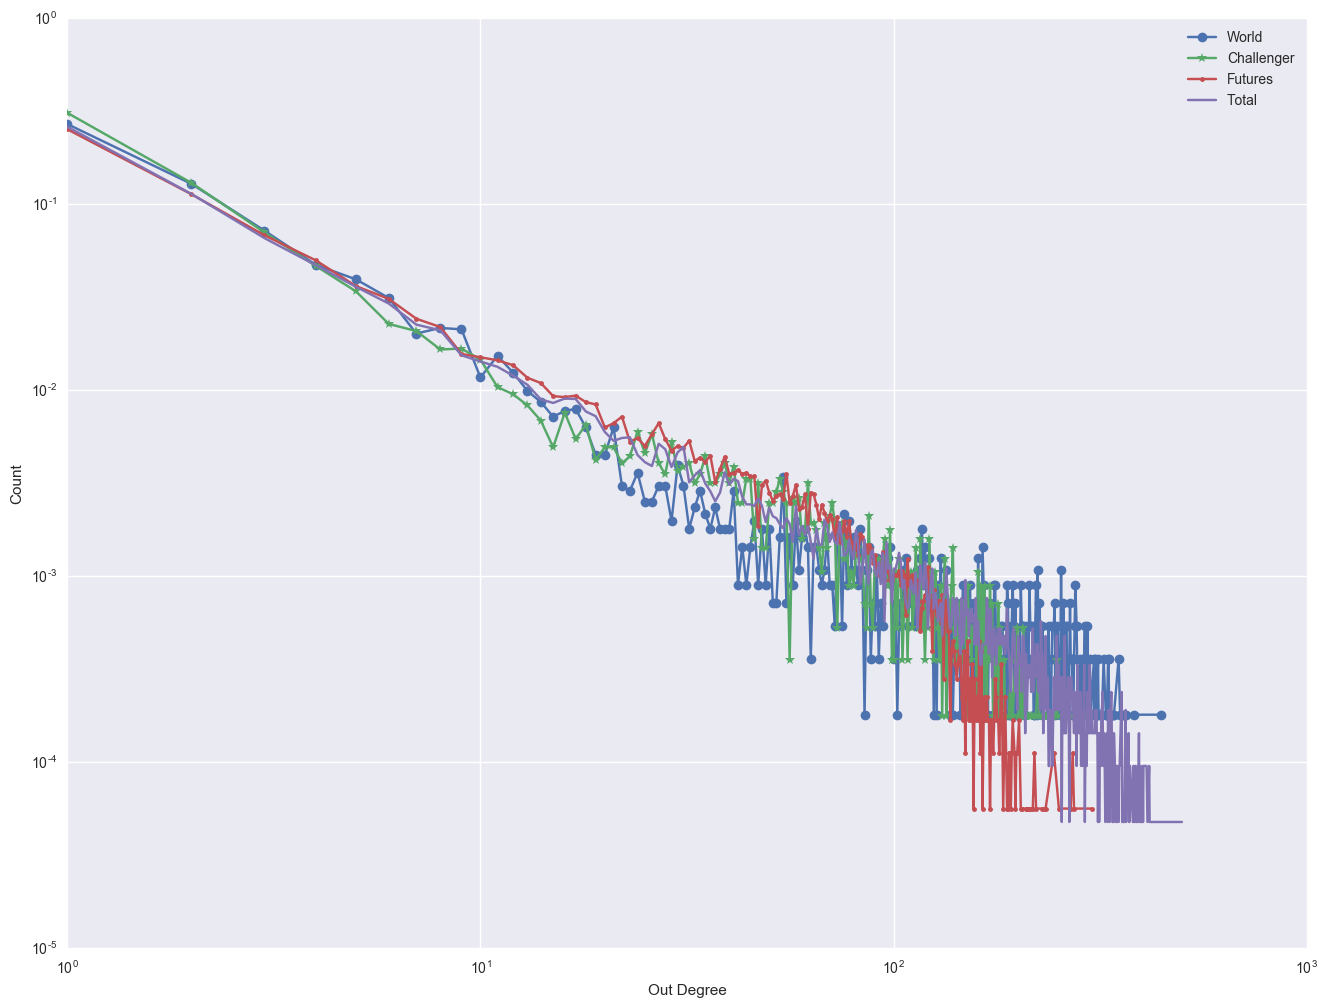

In [132]:
atp_deg_counts, atp_degs, atp_cdf, atp_ccdf, atp_pdf = utils.get_out_dists(atp_directed_graph)
qual_deg_counts, qual_degs, qual_cdf, qual_ccdf, qual_pdf = utils.get_out_dists(qual_directed_graph)
futures_deg_counts, futures_degs, futures_cdf, futures_ccdf, futures_pdf = utils.get_out_dists(futures_directed_graph)
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_out_dists(total_directed_graph)

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(atp_degs, atp_pdf, marker='o')
ax.plot(qual_degs, qual_pdf, marker='*')
ax.plot(futures_degs, futures_pdf, marker='.')
ax.plot(total_degs, total_pdf)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('Out Degree')
ax.legend(['World', 'Challenger', 'Futures', 'Total'])
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


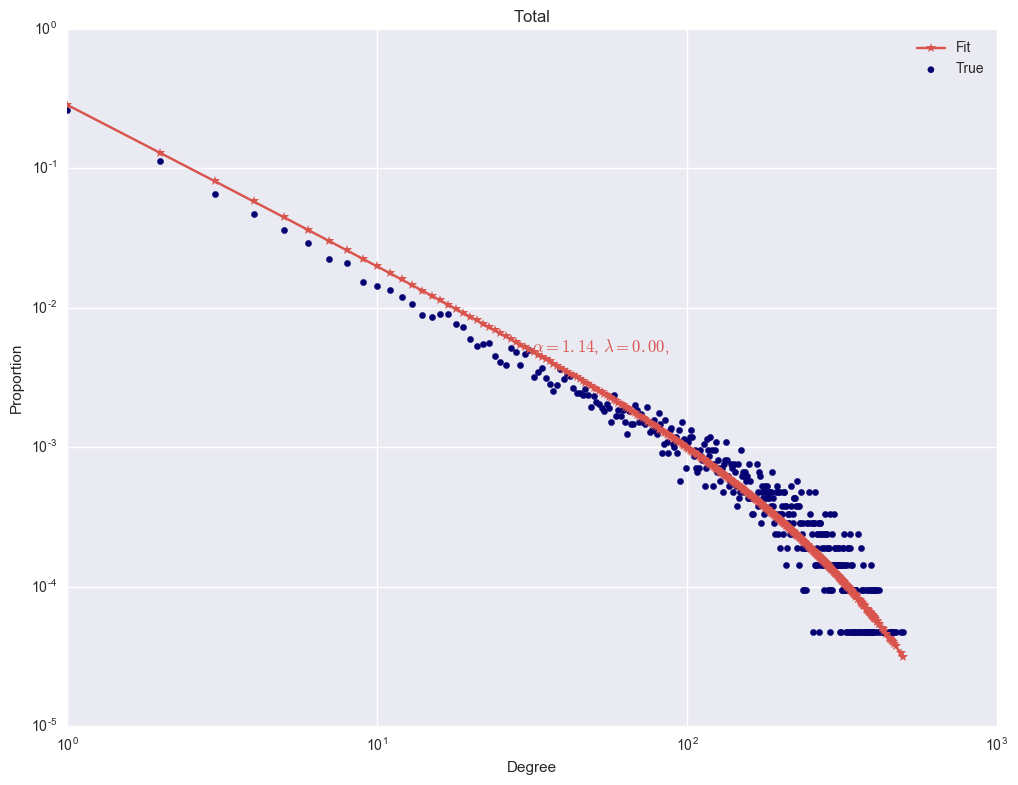

In [139]:
total_deg_counts, total_degs, total_cdf, total_ccdf, total_pdf = utils.get_out_dists(total_directed_graph)
out_deg_data = utils.get_out_deg_data(total_directed_graph)
test_alpha, test_lambda, test_xmin,_ = utils.fit_truncated(out_deg_data)
utils.plot_fit(test_alpha, test_lambda, test_xmin, test_pdf, test_ccdf, test_degs, title="Total")

In [142]:
total_directed_ranks = get_page_ranks(total_directed_graph, names_df)
atp_directed_ranks = get_page_ranks(atp_directed_graph, names_df)
quals_directed_ranks = get_page_ranks(qual_directed_graph, names_df)
f_directed_ranks = get_page_ranks(futures_directed_graph, names_df)

In [169]:
names_df

,id,name
0,0,Miles Bugby
1,1,Benjamin Bonzi
2,2,Cedric Pucheux
3,3,Silviu Balan
4,4,Remigio Burzio
5,5,Eduard Schneider
6,6,Victor Poncelet
7,7,Shao Fan Liu
8,8,Guillermo Nunez
9,9,Myron Franks


In [171]:
id2names = {}
names2id = {}
for player_id, name in names_df.itertuples(False):
    id2names[player_id] = name
    names2id[name] = player_id



In [215]:
reload(utils)

<module 'utils' from 'utils.py'>

In [216]:
cumulative_ranks_by_year = utils.cumulative_year_page_rank(df, id2names)
ranks_2015 = sorted(list(cumulative_ranks_by_year[2015].iteritems()), key=lambda x : x[1], reverse=True)
players = [x[0] for x in ranks_2015]

In [217]:
top_10 = players[:10]
midrange_10 = random.sample(players[100:200], 10)
lowrange_10 = random.sample(players[500:600], 10)

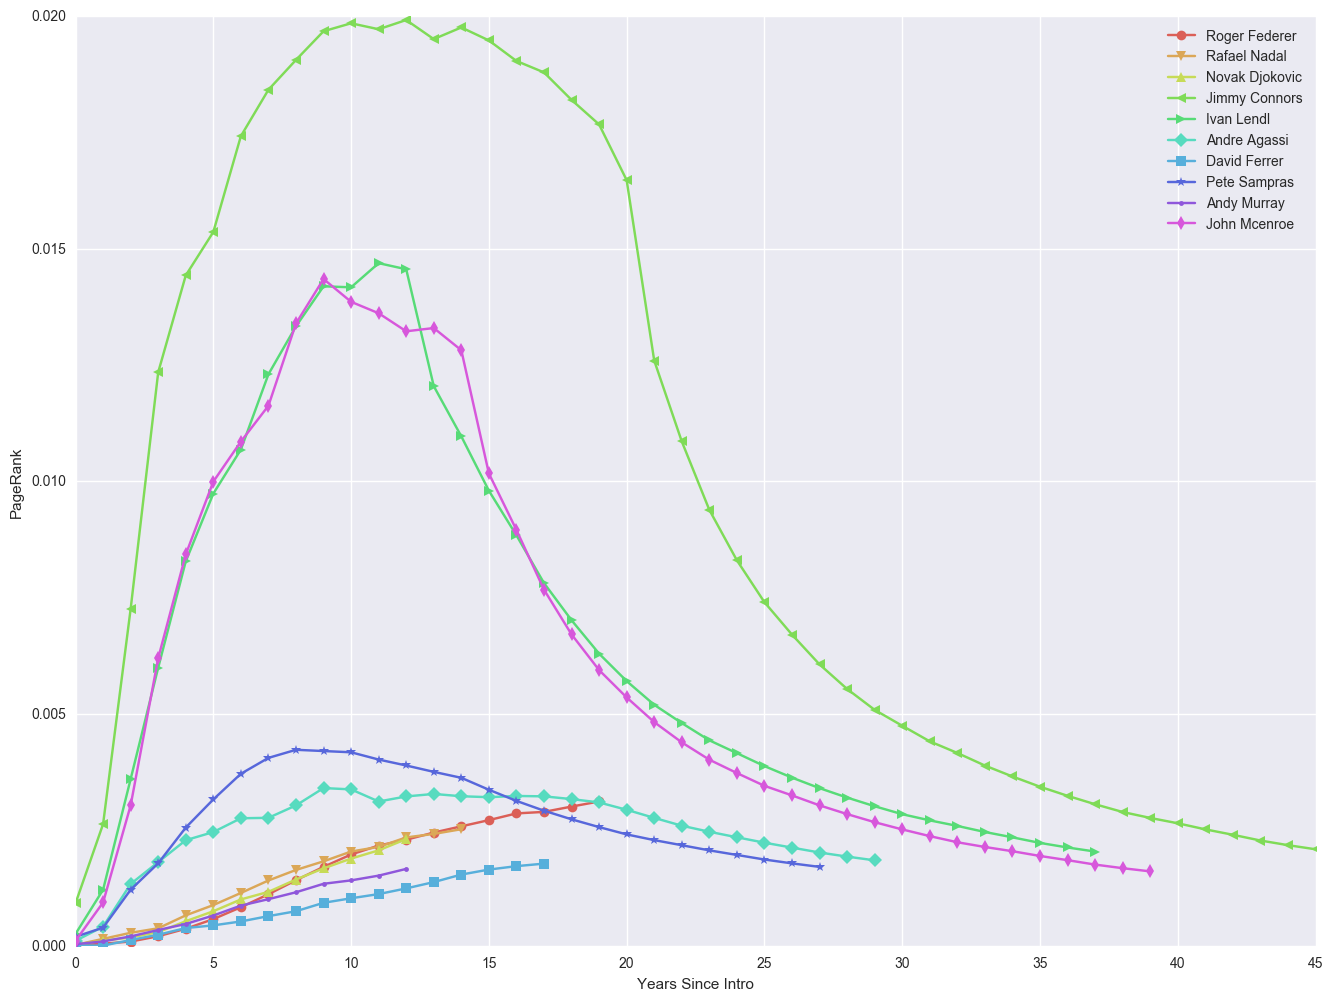

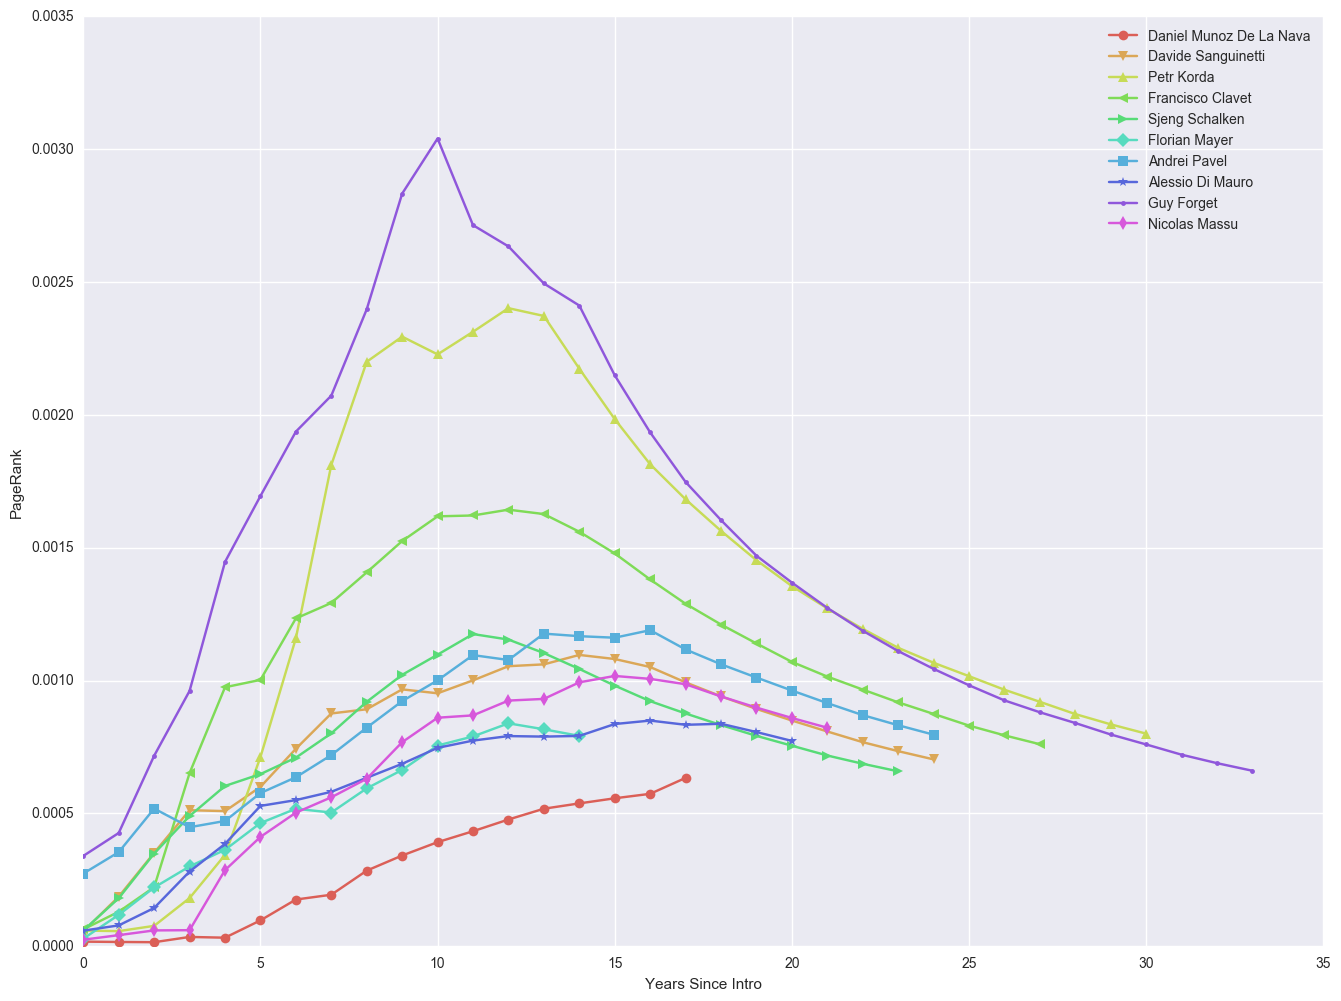

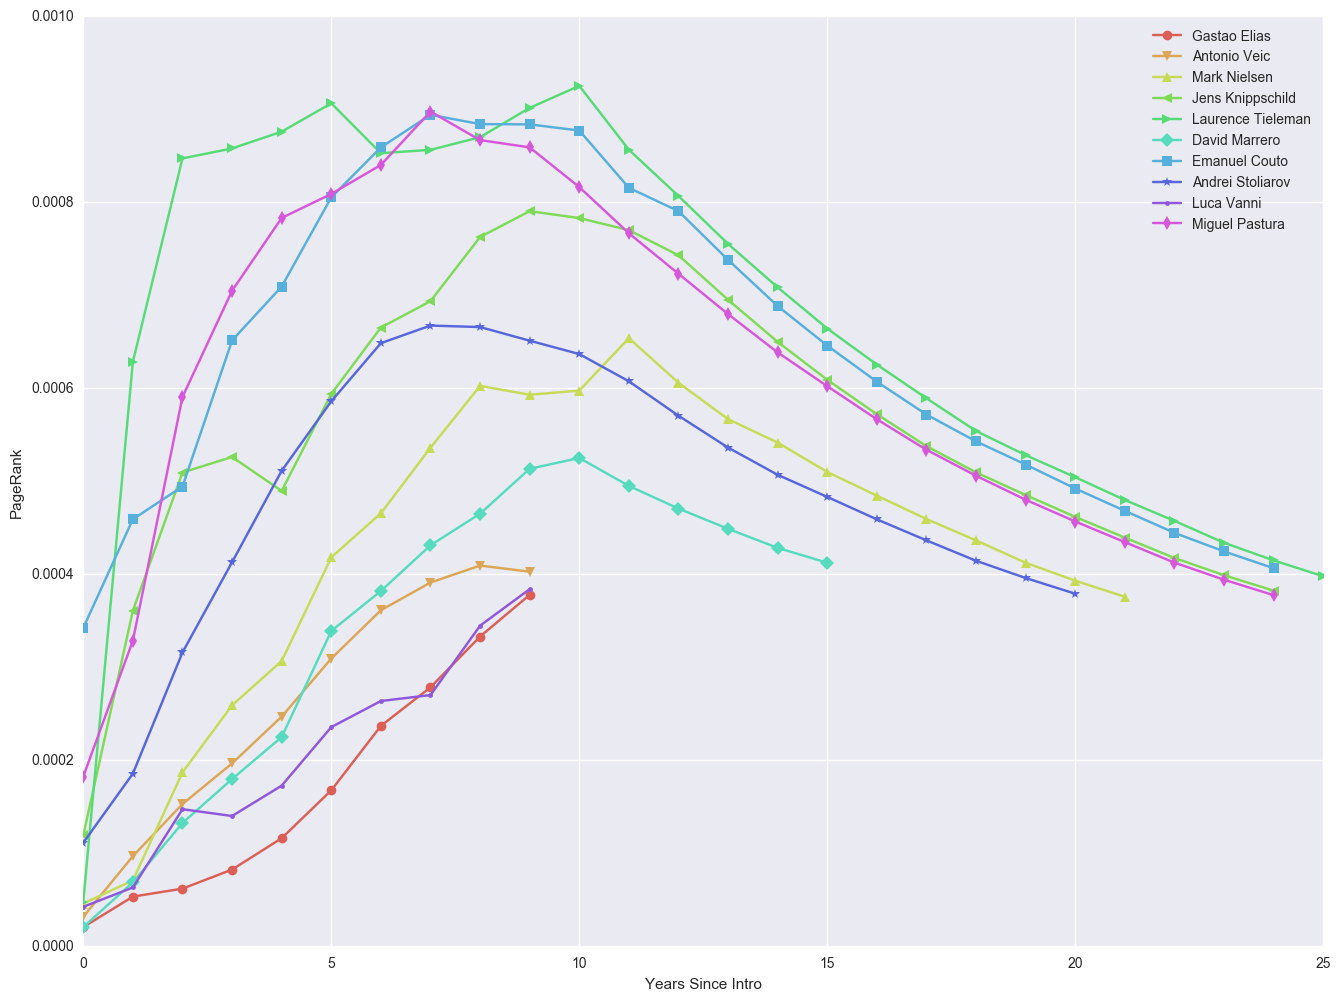

In [235]:
sns.set_palette(sns.color_palette("hls", 11))
markers = itertools.cycle('ov^<>Ds*.d')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

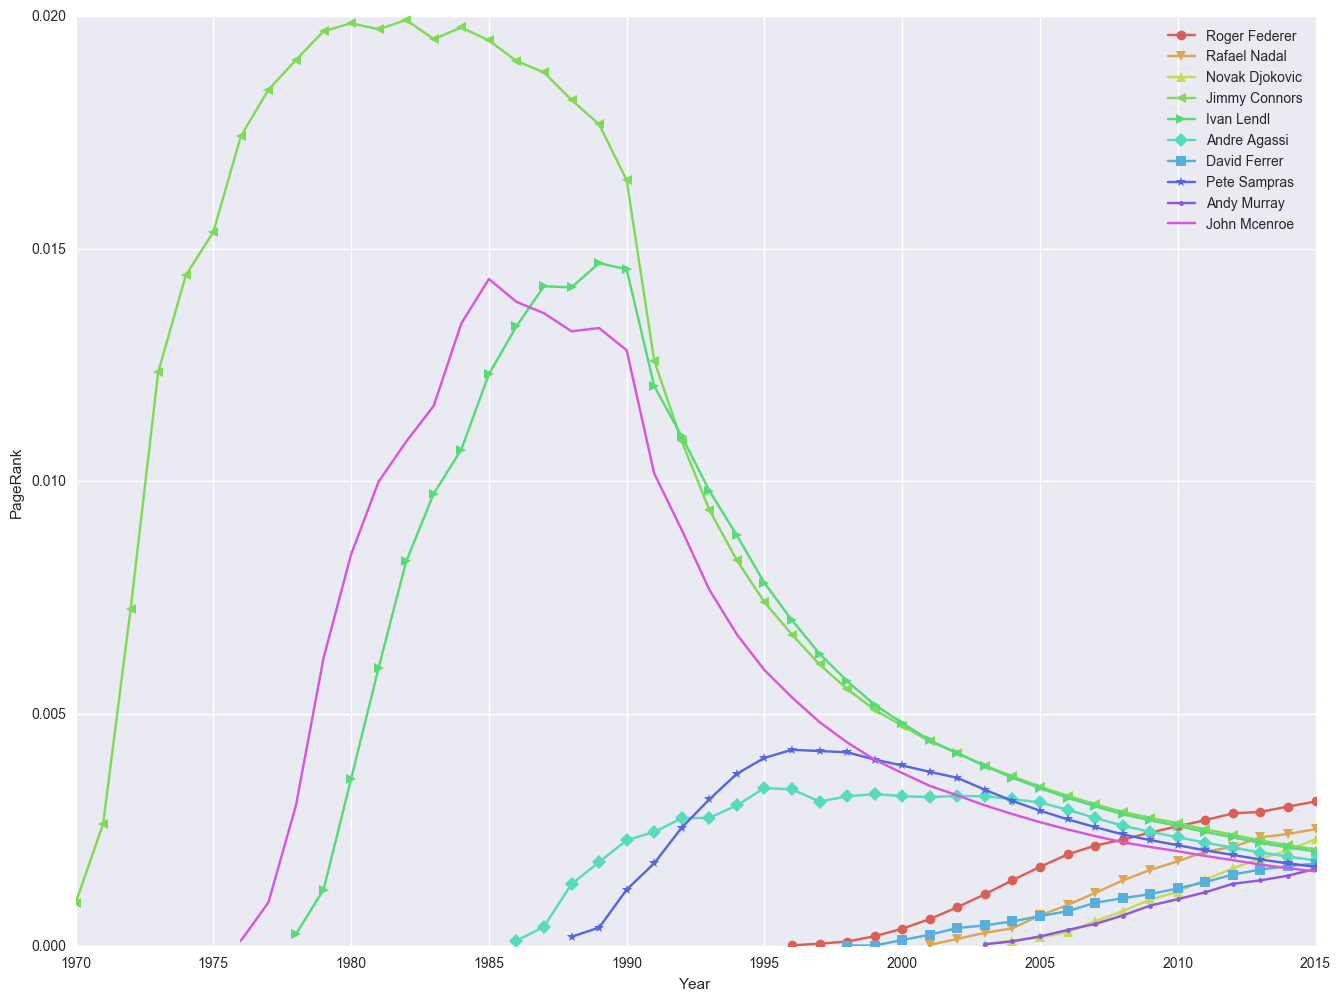

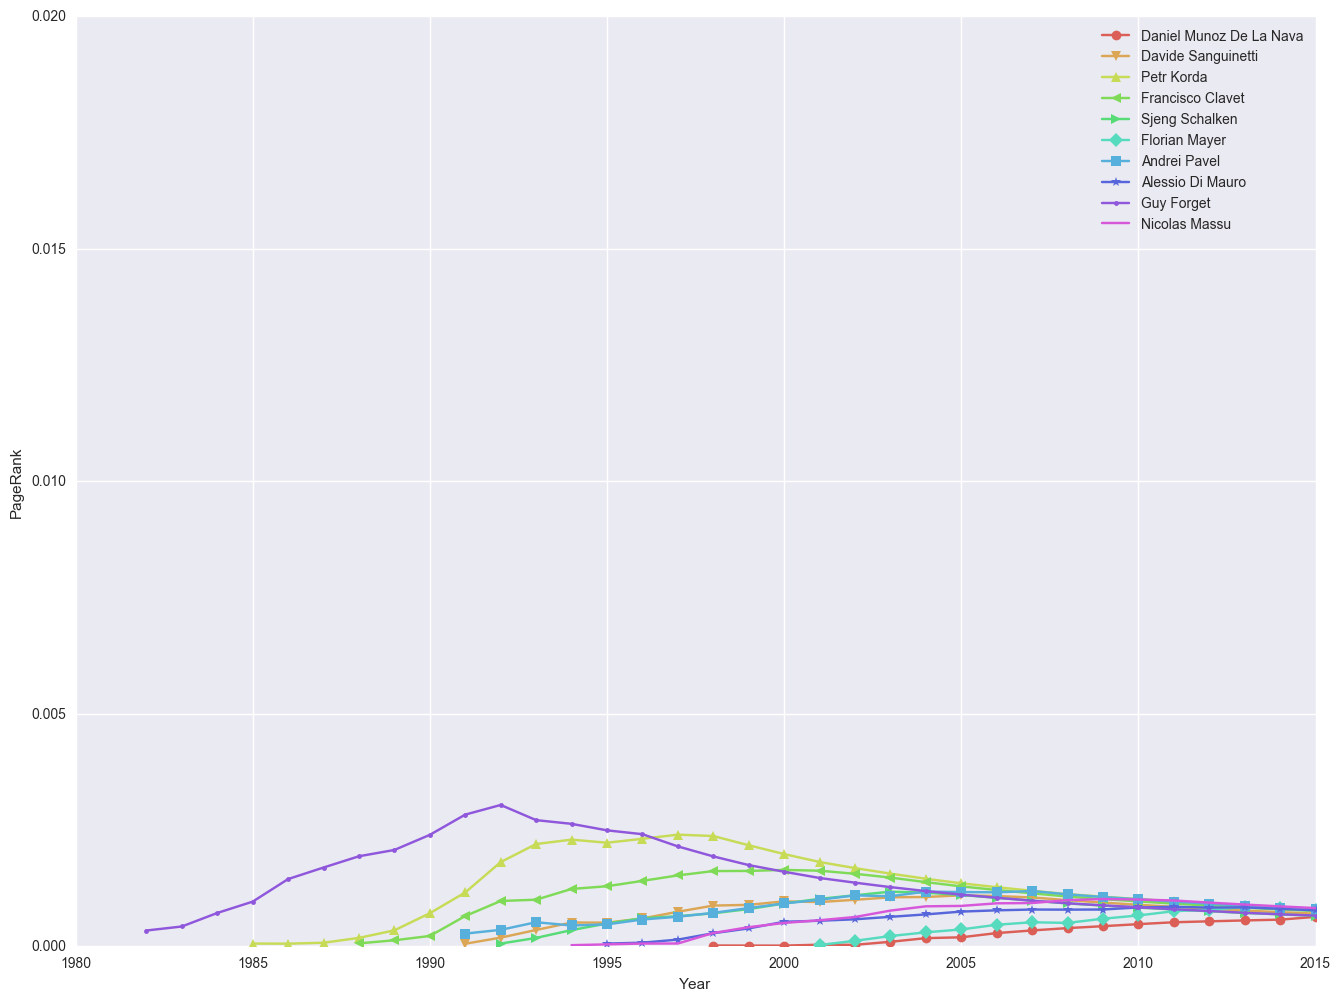

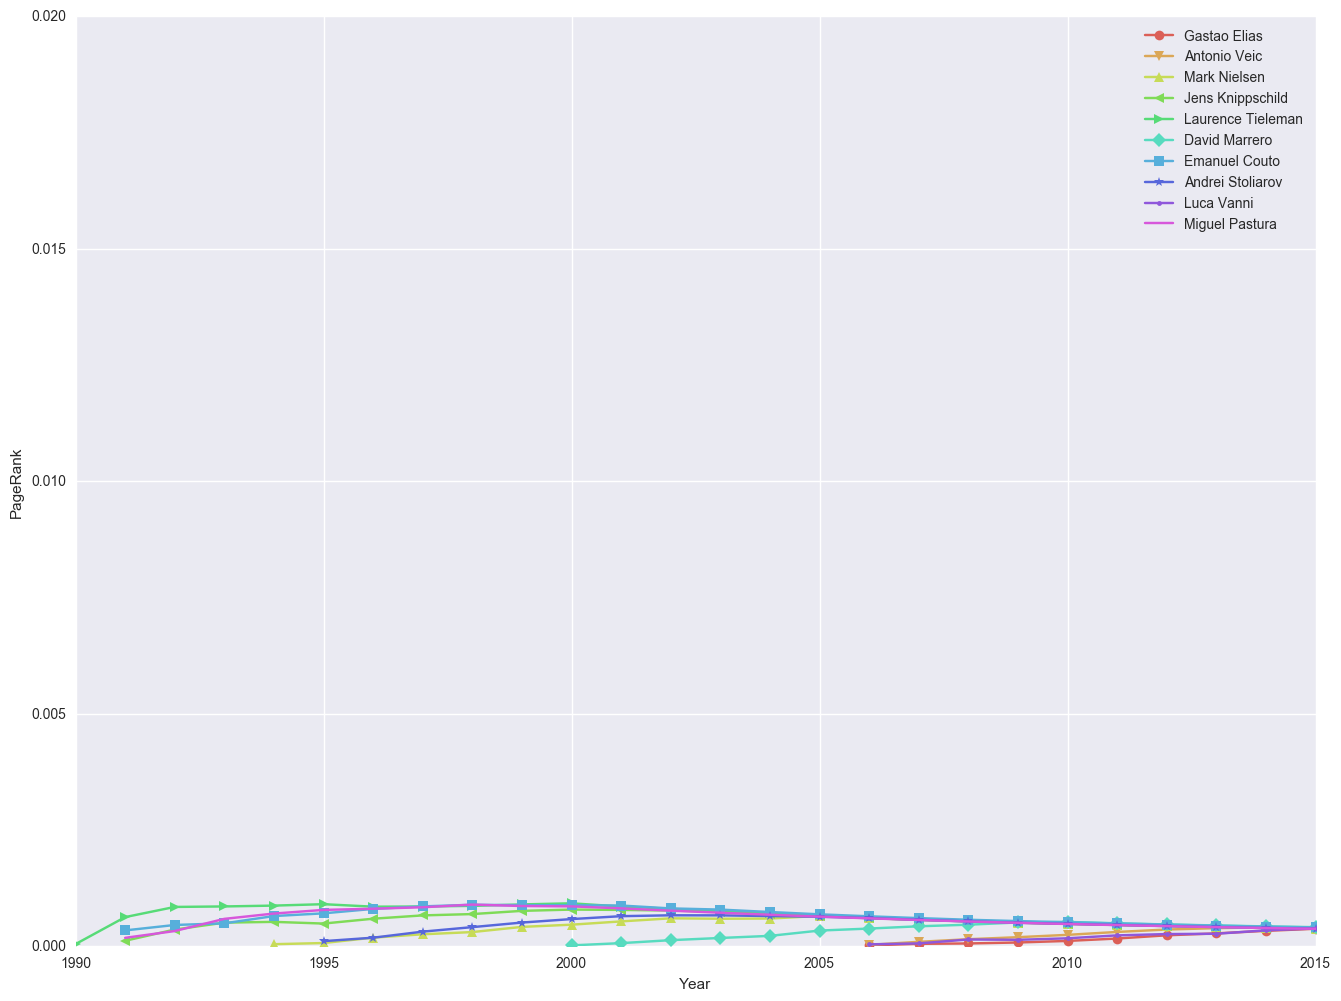

In [236]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.02])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.02])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, cumulative_ranks_by_year)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.02])
ax.set_xlabel('Year')
ax.legend()
plt.show()

In [221]:
single_year_ranks = utils.single_year_page_rank(df, id2names)
individual_ranks_2015 = list(single_year_ranks[2015].iteritems()).sort(key=lambda x : x[1], reverse=True)
individual_players = [x[0] for x in ranks_2015]

In [222]:
top_10_individual = individual_players[:10]
midrange_10_individual = random.sample(individual_players[100:200], 10)
lowrange_10_individual = random.sample(individual_players[500:600], 10)

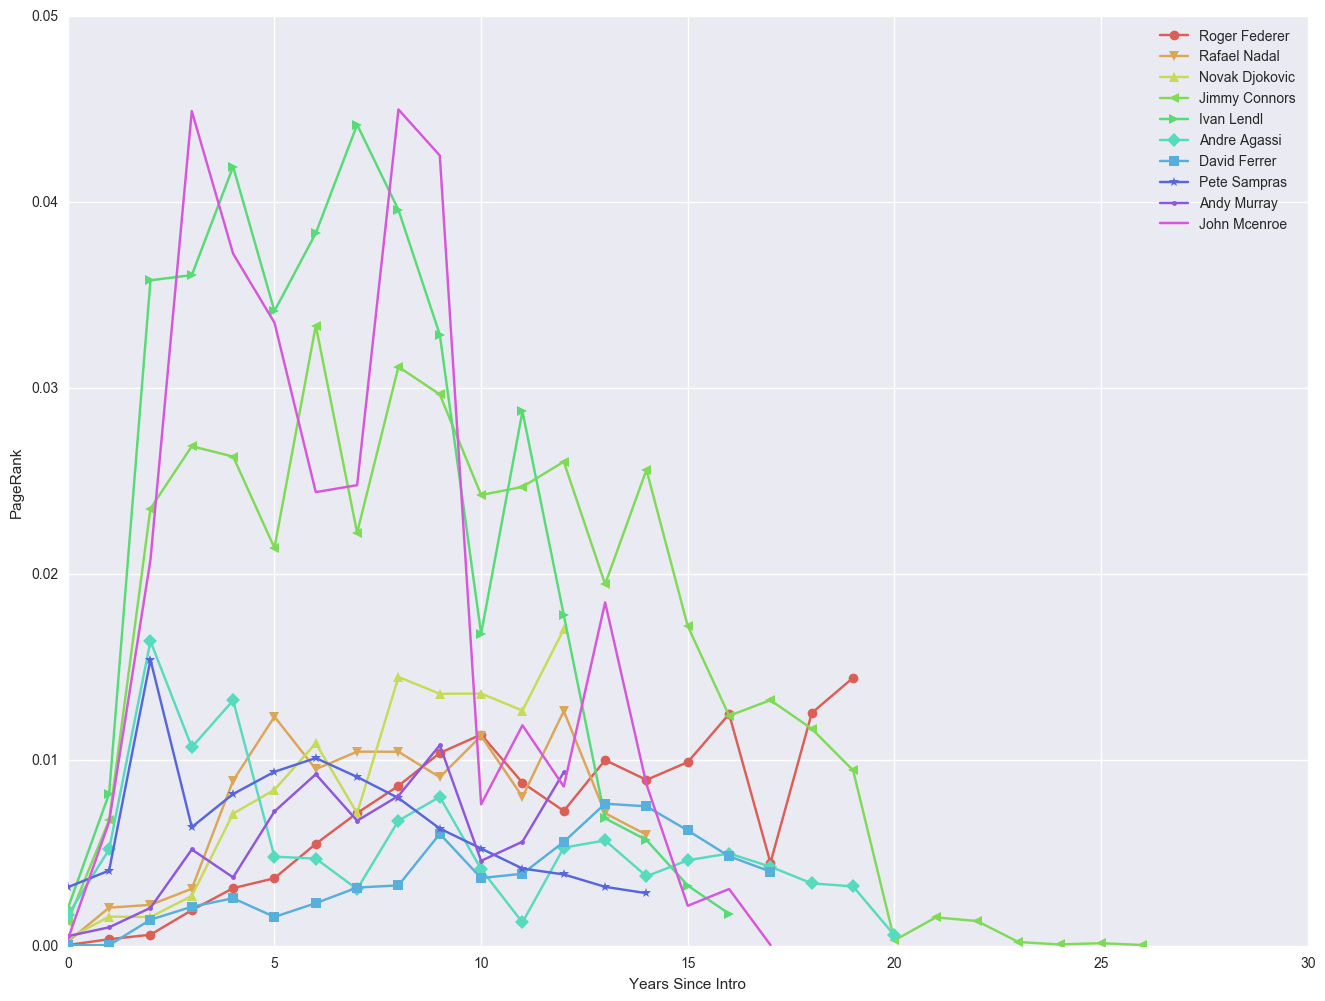

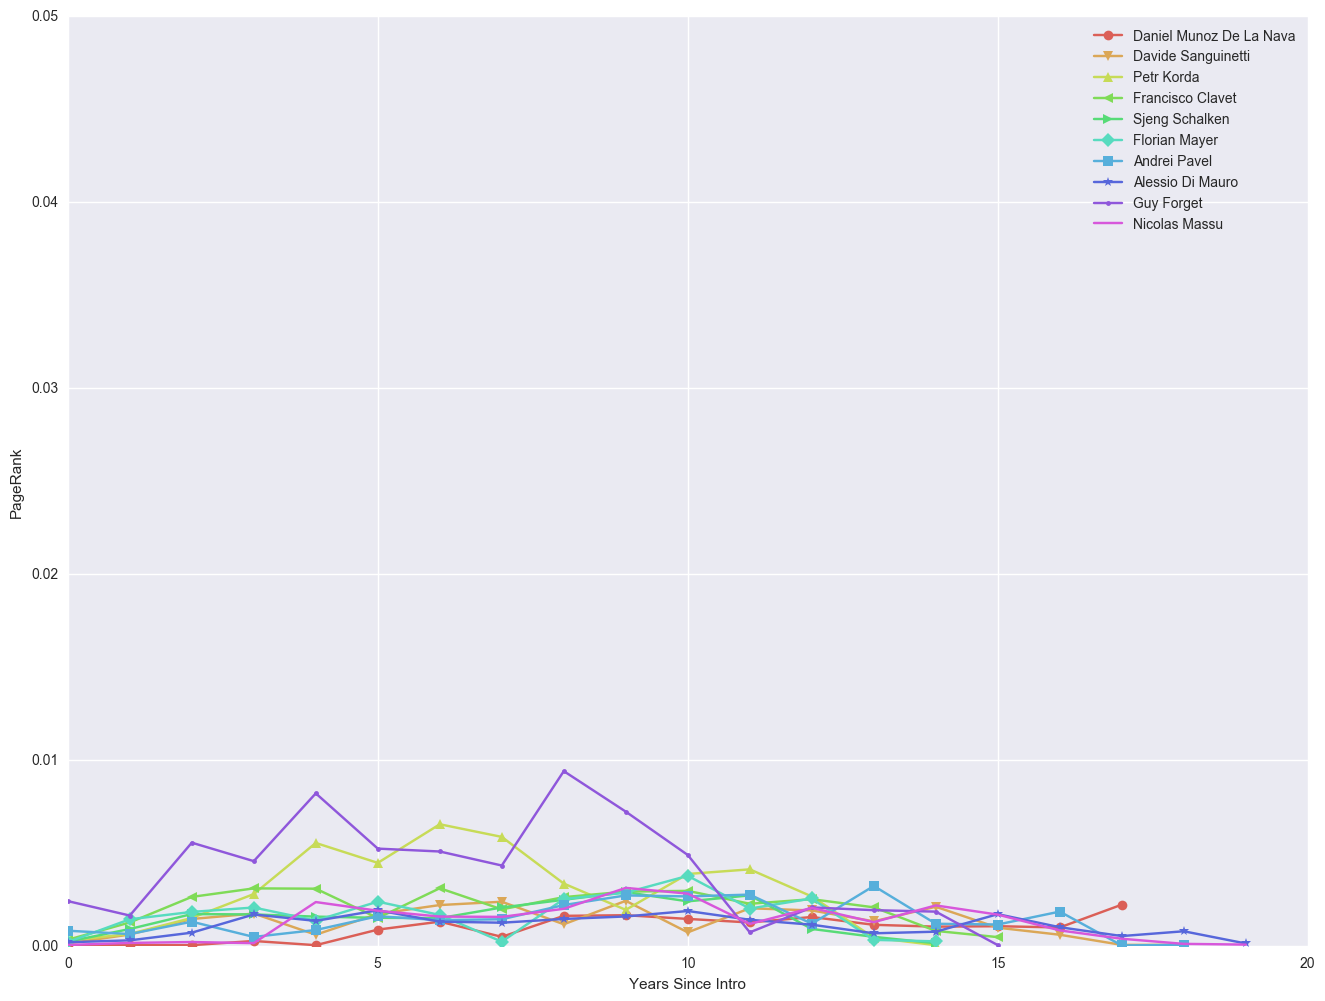

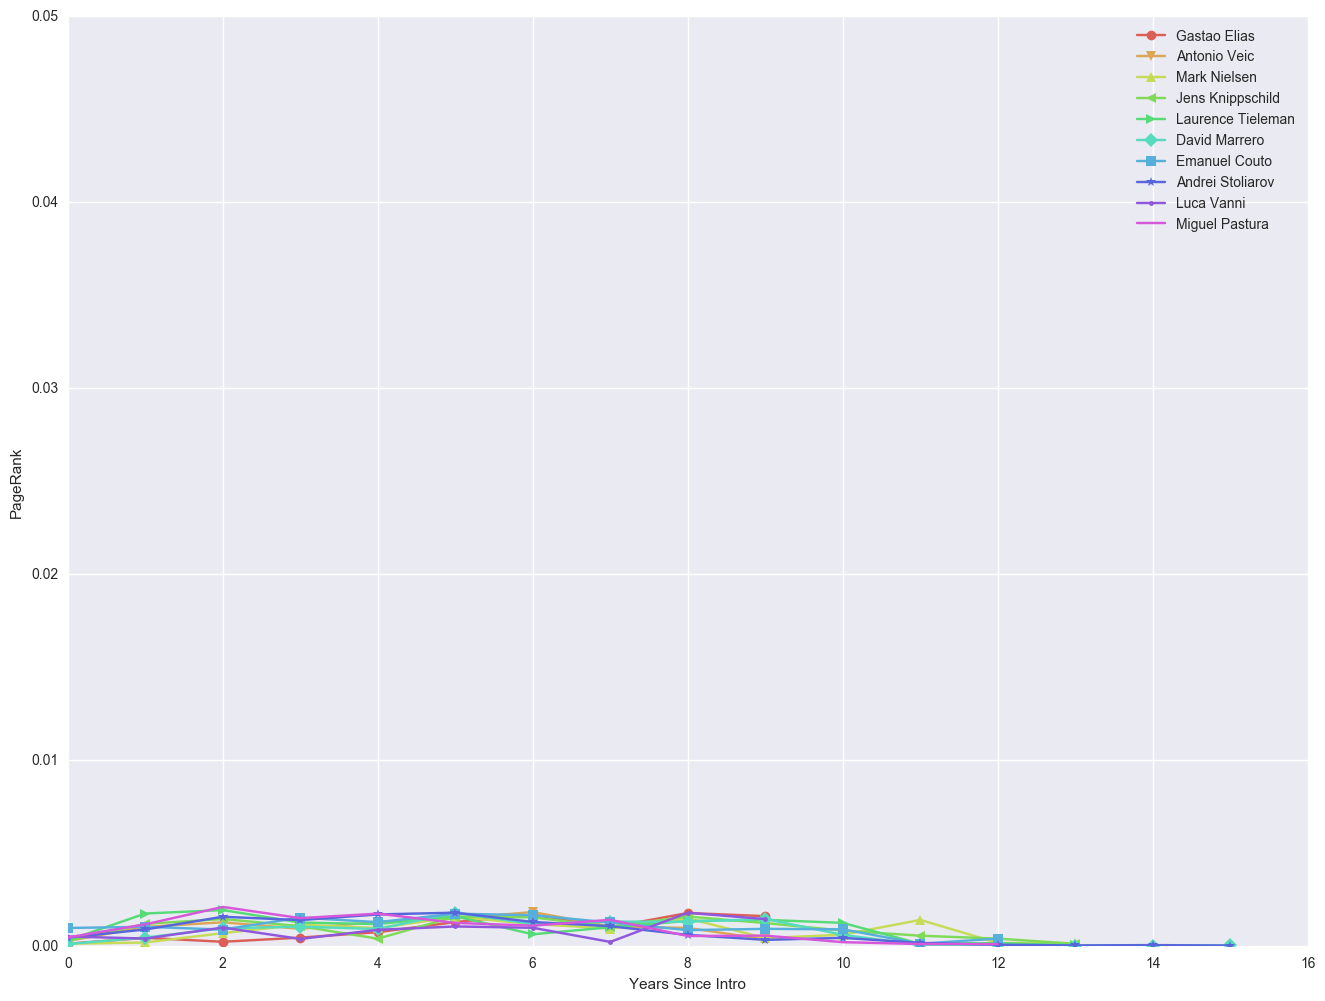

In [237]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, single_year_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, single_year_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ax.plot(utils.get_player_ranks(player, names2id, single_year_ranks)[0], label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Years Since Intro')
ax.legend()
plt.show()

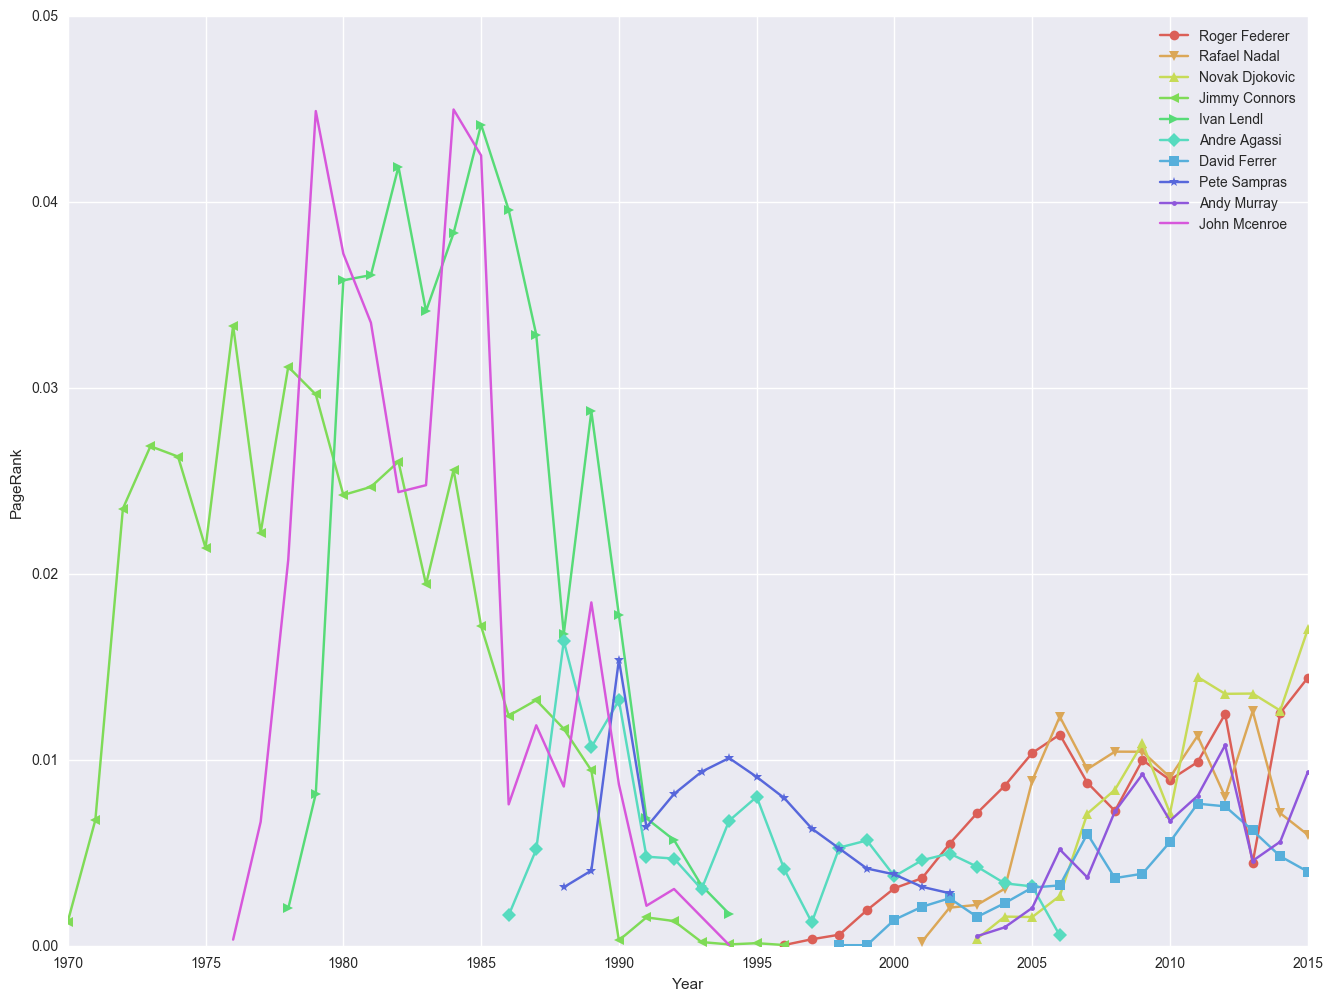

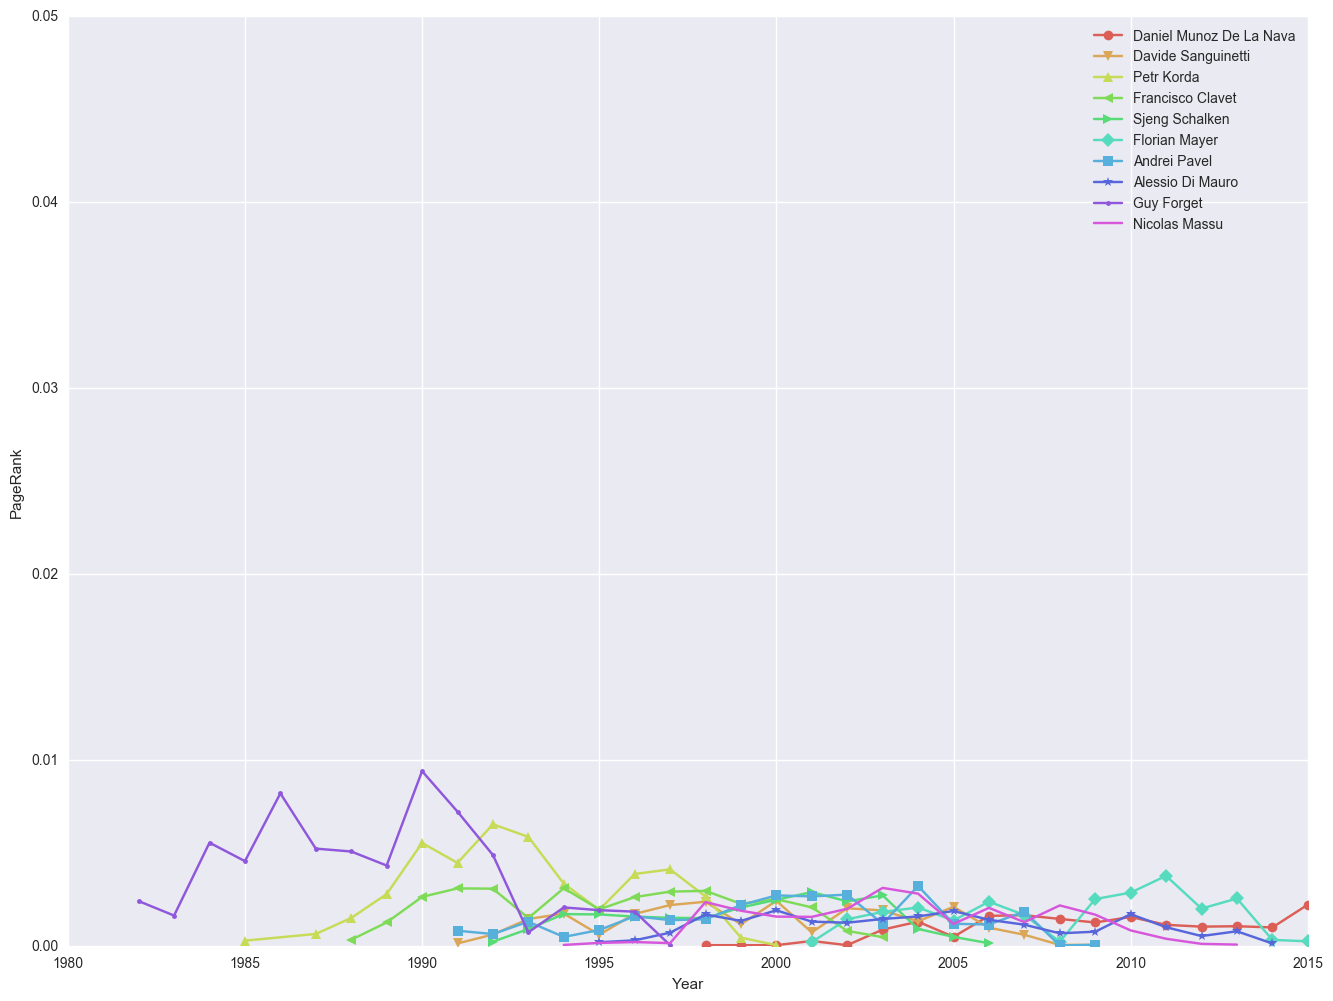

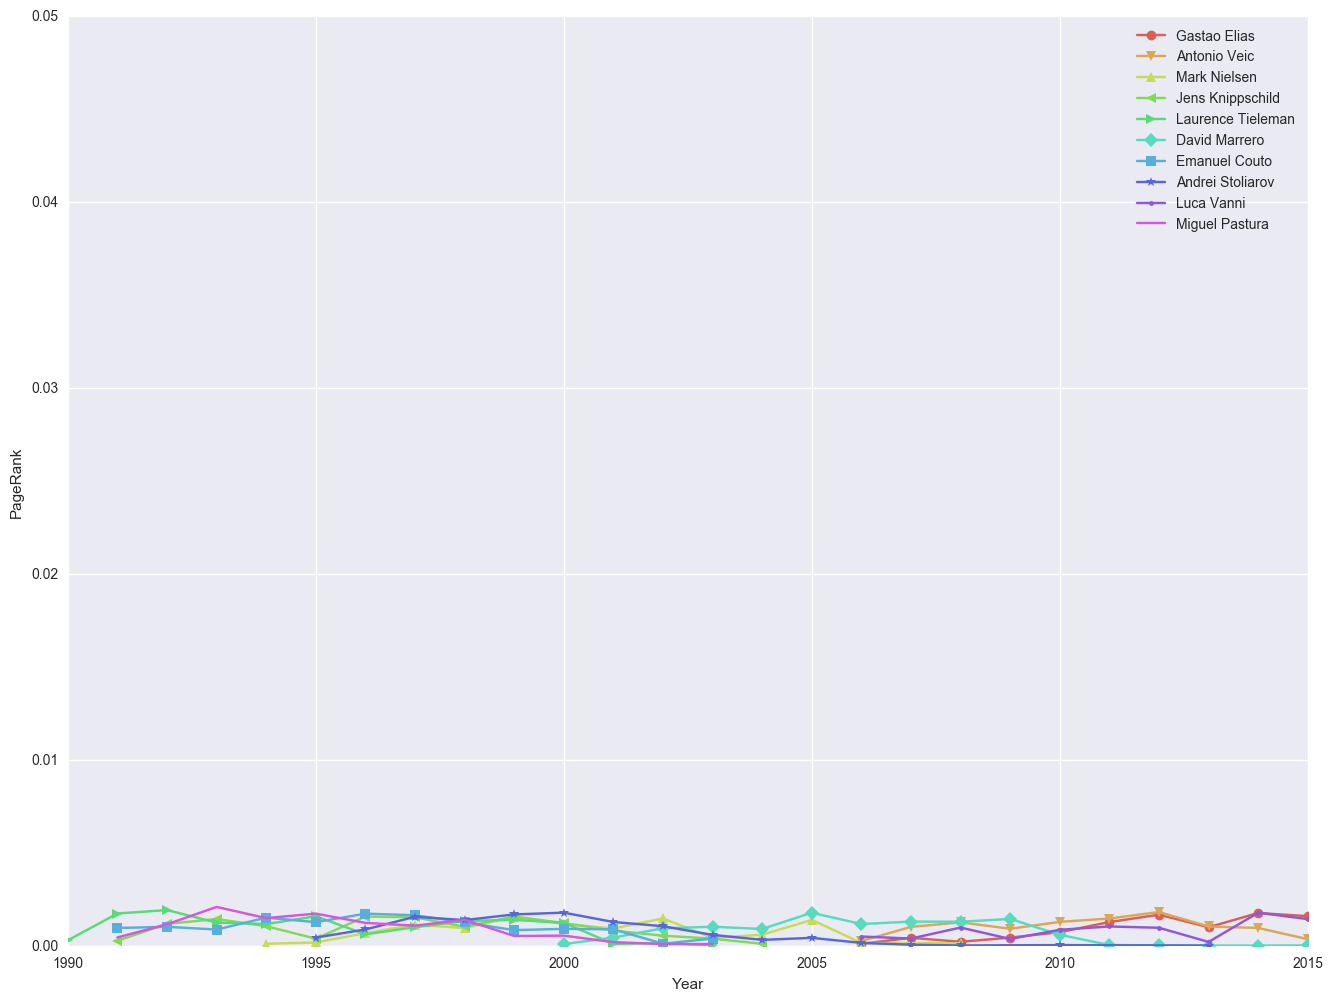

In [238]:
markers = itertools.cycle('ov^<>Ds*.x')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(top_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, single_year_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(midrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, single_year_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Year')
ax.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
for player, marker in zip(lowrange_10, markers):
    ranks, years = utils.get_player_ranks(player, names2id, single_year_ranks)
    ax.plot(years, ranks, label=player, marker=marker)
ax.set_ylabel('PageRank')
ax.set_ylim([0,0.05])
ax.set_xlabel('Year')
ax.legend()
plt.show()

In [86]:
plot_map = snap.TIntStrH()
for p_id, p_name in names_df.itertuples(False):
    plot_map[p_id] = p_name

In [88]:
snap.DrawGViz(tempG, snap.gvlNeato, "test.png", "test graph", plot_map)

In [92]:
df.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                    float64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                      int64
winner_id                      int64
winner_seed                  float64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                    float64
winner_ioc                    object
winner_age                   float64
winner_rank                  float64
winner_rank_points           float64
loser_id                       int64
loser_seed                   float64
loser_entry                   object
loser_name                    object
loser_hand                    object
loser_ht                     float64
loser_ioc                     object
loser_age                    float64
loser_rank                   float64
loser_rank_points            float64
s

In [93]:
years = df['year'].unique()
for year in years:
    if any(df[df['year']==year]['winner_name'].str.contains("ederer")) or any(df[df['year']==year]['loser_name'].str.contains("ederer")):
        print year
        

1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
